# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

[Acceso al Repositorio](https://github.com/MartinaFerrero/Acamica)

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


Se importan los datasets con la información del paso de vehículos por las unidades de peaje AUSA para los años 2017, 2018 y 2019.

Fuente: Autopistas Urbanas (AUSA). Secretaría de Transporte y Obras Públicas. Jefatura de Gabinete de Ministros. Gobierno de la Ciudad de Buenos Aires.

Se procede a realizar el análisis exploratorio de datos.


In [247]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [248]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [249]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [250]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [251]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [252]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [253]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [254]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [255]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [256]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [257]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [258]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]

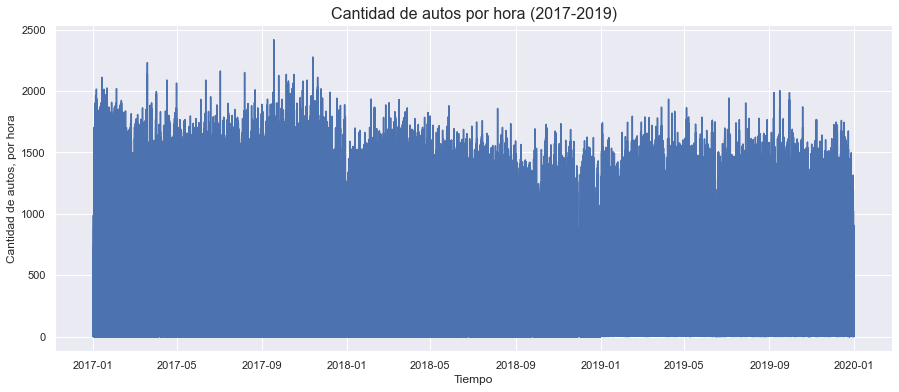

In [259]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title("Cantidad de autos por hora (2017-2019)", fontsize = 16)
plt.show()

In [260]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

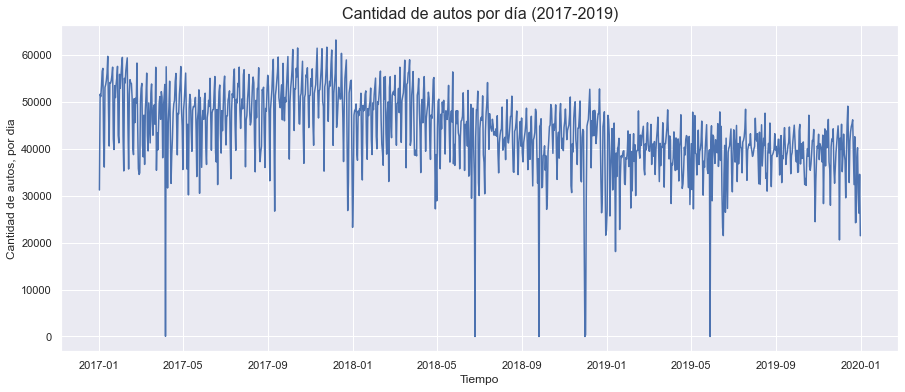

In [261]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de autos por día (2017-2019)", fontsize = 16)
plt.show()

### Exploración de datos


**Detección de valores atípicos**:

Al observar el gráfico con la distribución de la cantidad de autos por día, se observan algunos valores atípicos, especialmente, en aquellos registros inferiores a los 10.0000 pasos diarios. Para no alterar el índice eliminando dichos registros, se procede a asignarlos como NaN, para luego reemplazar estos últimos por el valor medio de la serie.



In [262]:
diario.cantidad_pasos[diario.cantidad_pasos < 10000] = np.nan

diario['cantidad_pasos']=diario.cantidad_pasos.fillna(diario.cantidad_pasos.rolling(4, min_periods=1).mean())


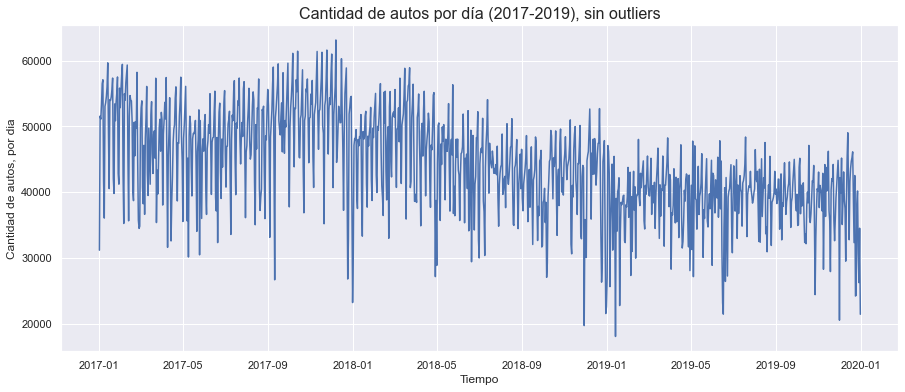

In [263]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de autos por día (2017-2019), sin outliers", fontsize = 16)
plt.show()

**Distribución de pasos por día:** Al realizar un histograma sobre la distribución de la cantidad de pasos diarios, puede observarse que la misma es simétrica, aproximándose a una distribución gaussiana.

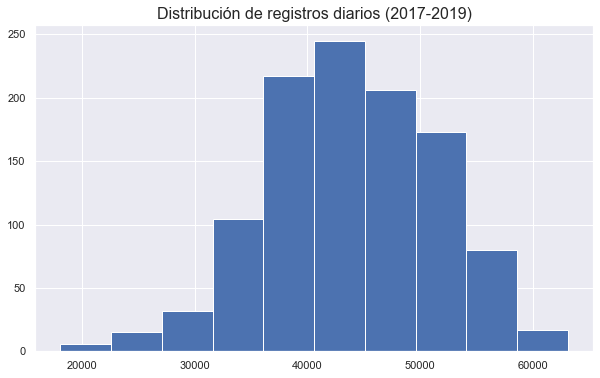

In [264]:
plt.figure(figsize = (10,6))
plt.hist(diario.cantidad_pasos)
plt.title("Distribución de registros diarios (2017-2019)", fontsize = 16)
plt.show()

**Valores faltantes:** Para verificar la composición de la serie con la que se está trabajando, se imprimen la cantidad de valores faltantes por columnas que, al ser 0 (cero), permite continuar con el flujo de trabajo.

In [265]:
print('Cantidad de valores faltantes por columnas')
diario.isnull().sum()

Cantidad de valores faltantes por columnas


cantidad_pasos    0
dtype: int64

In [266]:
#Se realiza una copia del dataser original para continuar trabajando 

dt_original = diario.copy()
dt_original.head()

cantidad_pasos
fecha                     
2017-01-01         31183.0
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0

**Cantidad promedio de pasos según año:** En el siguiente gráfico puede observarse el promedio de pasos diarios por año. Así, se advierte que el flujo va disminuyendo con el paso de los años, con el mayor promedio de registros en 2017, y el menor en 2019. Esto puede deberse a una disminución en el tráfico por la Autopista, o bien, puede pensarse que existió una migración en la forma de pago utilizada, y que los automovilistas optaron, por ejemplo, por abonar con "Telepase".

Text(0.5, 1.0, 'Cantidad promedio de pasos diarios según año')

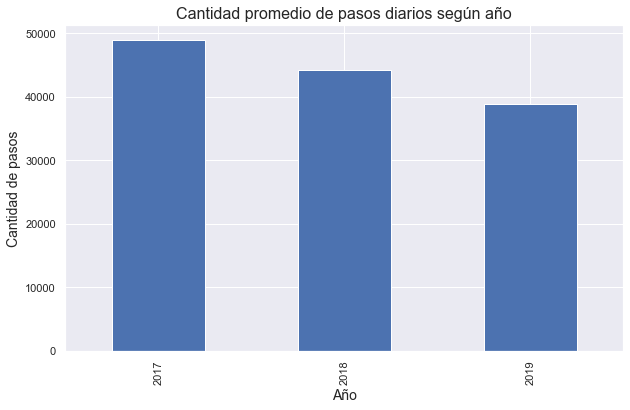

In [267]:
dt_original.reset_index(inplace=True)

plt.figure(figsize = (10,6))
dt_original.groupby(dt_original.fecha.dt.year)['cantidad_pasos'].mean().plot.bar()
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.title("Cantidad promedio de pasos diarios según año", fontsize = 16)

**Cantidad promedio de pasos según mes:** Al graficar los promedios de pasos mensuales para toda la serie, no se advierten marcadas difernecias entre los meses del año. Incluso, los registros no toman valores muy diferentes en los meses de verano en los que se podrían esperar valores más bajos debido a que son períodos en los que es usual que la población que reside y trabaja en la Ciudad y Provincia de Buenos Aires toma vacaciones. De hecho, febrero y marzo son algunos de los meses con promedios más altos.

Text(0.5, 1.0, 'Cantidad promedio de pasos según mes')

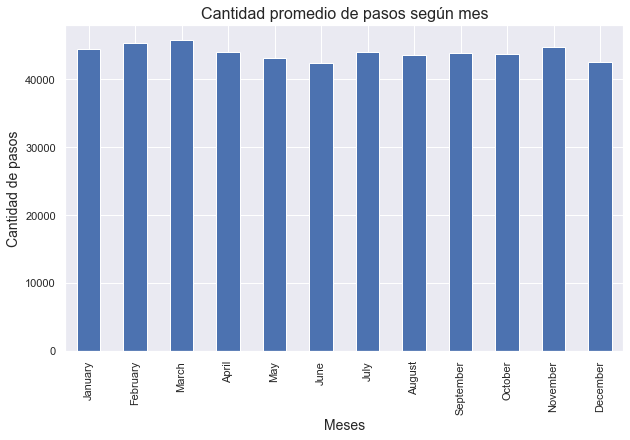

In [268]:

dt_original.reset_index(inplace=True)


plt.figure(figsize = (10,6))
dt_original.groupby(dt_original.fecha.dt.month_name(), sort=False)['cantidad_pasos'].mean().plot.bar()
plt.xlabel('Meses', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.title("Cantidad promedio de pasos según mes", fontsize = 16)

**Cantidad de pasos según día de la semana:**

In [269]:
dias= dt_original.groupby(dt_original.fecha.dt.day_name()).sum().sort_values('cantidad_pasos', ascending=False)
dias

index  cantidad_pasos
fecha                           
Friday     85410    7.683112e+06
Thursday   85254    7.353255e+06
Wednesday  85098    7.163005e+06
Tuesday    86036    6.901987e+06
Monday     85879    6.732595e+06
Saturday   85566    6.473091e+06
Sunday     85722    5.791961e+06

In [270]:
dias= dataset.groupby(dataset.fecha.dt.day_name()).sum().sort_values('cantidad_pasos', ascending=False)
dias

cantidad_pasos
fecha                    
Friday            7647272
Thursday          7302169
Wednesday         7125526
Tuesday           6865551
Monday            6691387
Saturday          6441715
Sunday            5791961

Text(0.5, 1.0, 'Cantidad promedio de pasos según día de la semana')

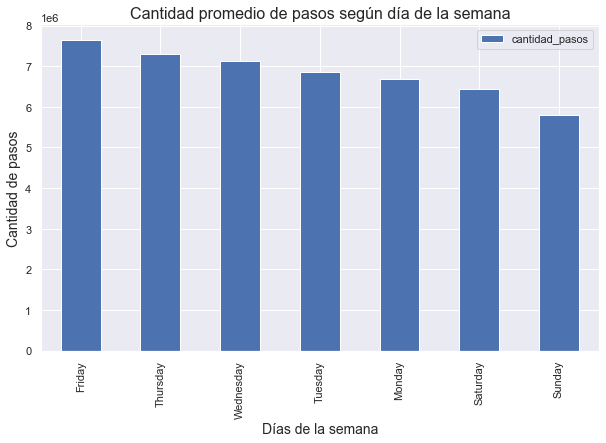

In [271]:
sns.set(rc={'figure.figsize':(10,6)})
dias.plot.bar()
plt.xlabel('Días de la semana', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.title("Cantidad promedio de pasos según día de la semana", fontsize = 16) #source=false

En el gráfico previamente visualizado sobre la cantidad promedio de pasos según el día de la semana, puede apreciarse que los mayores registros se ubican en los días viernes, y los más bajos en los sábados y domingos. Al ser estos últimos días no laborables, se observa que el flujo de circulación disminuye conforme a lo que podría ser esperado. 

El mayor promedio obtenido en los días viernes, podría ser explicado debido a la movilidad que tiene lugar usualmente en estos días, en la cual muchos trabajadores utilizan sus autos particulares para dirigirse a sus trabajos. Además, puede ocurrir que quienes viven en la Ciudad de Buenos Aires y tienen residencias de fin de semana en la Provincia, viajen a las mismas en estos días, incrementando el flujo en relación al resto de los días de la semana.

**Pasos según fin de semana / días de la semana**

In [272]:
#weekend variable

dt_original['day of week']=dt_original['fecha'].dt.dayofweek
temp=dt_original['fecha']

In [273]:
def applyer(row):
    if row.dayofweek== 5 or row.dayofweek==6:
        return 1
    else:
        return 0
    
temp2=dt_original['fecha'].apply(applyer)
dt_original['weekend']=temp2

Text(0.5, 1.0, 'Cantidad promedio de pasos según día de la semana / fin de semana')

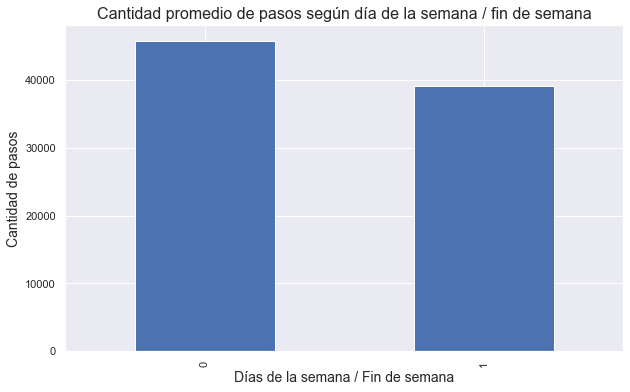

In [274]:
#Count on weekend

plt.figure(figsize = (10,6))
dt_original.groupby('weekend')['cantidad_pasos'].mean().plot.bar()
plt.xlabel('Días de la semana / Fin de semana', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.title("Cantidad promedio de pasos según día de la semana / fin de semana", fontsize = 16)

En el gráfico previamente visualizado, puede observarse que el tráfico disminuye los días de fin de semana (1), en comparación con el flujo registrado en los días hábiles.

**Resamplear a semanal y mensual**

A continuación, se realizan dos gráficos para resamplear la serie según la cantidad de pasos por semana y por mes. Dadas las observaciones obtenidas, se aprecia que al trabajar con un dataset con registros diarios, se obtiene una visualización más amigable, la cual va a permitir trabajar los puntos restantes de una manera más adecuada. 

In [275]:
#resampleo semanal

semanal_check= dataset.resample('W', on = 'fecha').mean().reset_index()
semanal_check.head()

fecha  cantidad_pasos
0 2017-01-01      134.991342
1 2017-01-08      159.344654
2 2017-01-15      168.002293
3 2017-01-22      162.963047
4 2017-01-29      161.540319

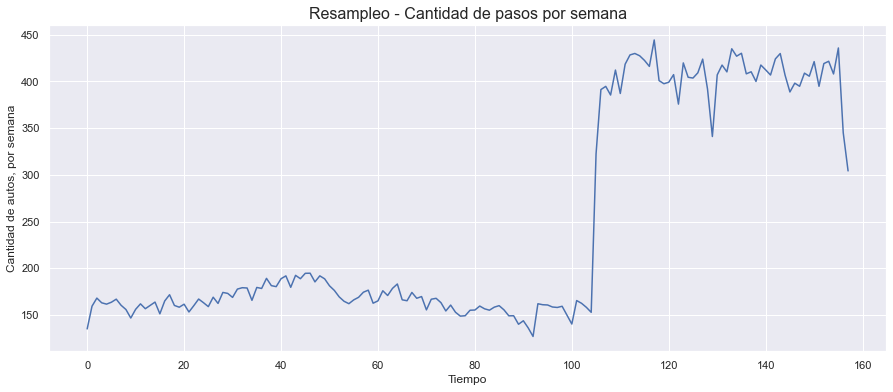

In [276]:
plt.figure(figsize = (15,6))
plt.plot(semanal_check.index, semanal_check.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.title("Resampleo - Cantidad de pasos por semana", fontsize = 16)
plt.show()

In [277]:
#resampleo mensual

month_check= dataset.resample('M', on = 'fecha').mean().reset_index()
month_check.head()

fecha  cantidad_pasos
0 2017-01-31      162.590631
1 2017-02-28      158.464659
2 2017-03-31      158.481380
3 2017-04-30      162.467187
4 2017-05-31      158.675688

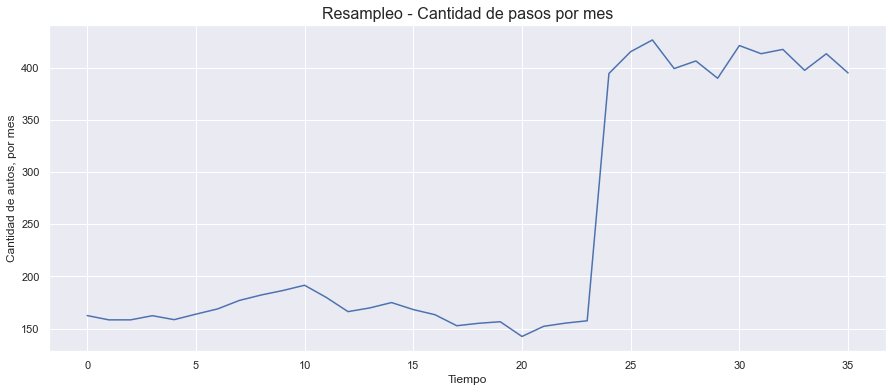

In [278]:
plt.figure(figsize = (15,6))
plt.plot(month_check.index, month_check.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.title("Resampleo - Cantidad de pasos por mes", fontsize = 16)
plt.show() 

**Autocorrelación**

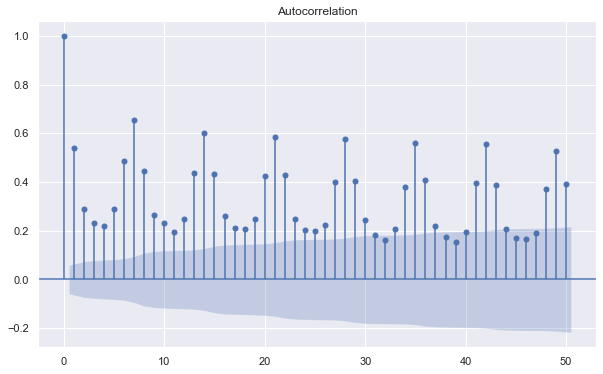

In [279]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario.cantidad_pasos, lags = 50)
plt.show() 

Al realizar la gráfica de autocorrelación, puede observarse un marcado componente semanal que, precisamente, nos permite afirmar que en la serie tiene ciclos semanales.

In [280]:
diario

cantidad_pasos
fecha                     
2017-01-01         31183.0
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0
...                    ...
2019-12-27         40182.0
2019-12-28         30681.0
2019-12-29         26259.0
2019-12-30         34523.0
2019-12-31         21447.0

[1095 rows x 1 columns]

#### Componentes de la serie

A continuación se grafican distintos pronósticos de media móvil usando 7 (semanal), 14 (quincenal) y 30 observaciones (mensual), probando distintas ventanas de tiempo para obervar qué es lo que captura la serie.

En el primero de los gráficos vemos cada dinámica y cómo se suaviza. Así, buscamos una media móvil cada 7 días, cada una quincena, y cada mes. Y aún así, en las 3 mediciones, vemos cómo continúa suavizándose, y que la gran disparidad que hay al inicio de la distribución es más bien semanal, pero se va suavizando a medida que apliamos la ventana. 

Esto último es así dado que, a medida que se ampliían esas ventanas, estamos promediando sobre una mayor cantidad de datos.

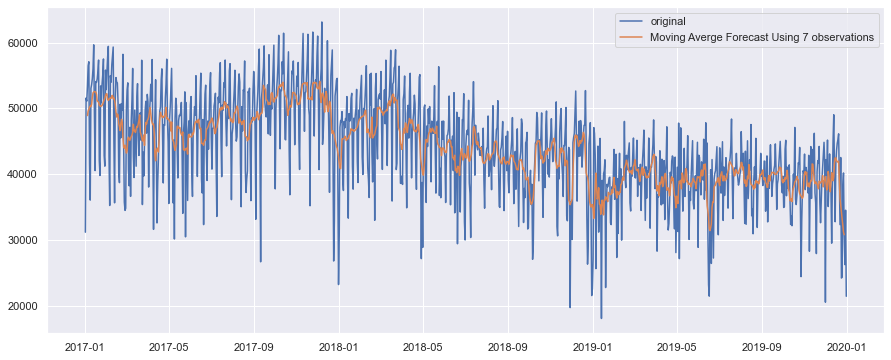

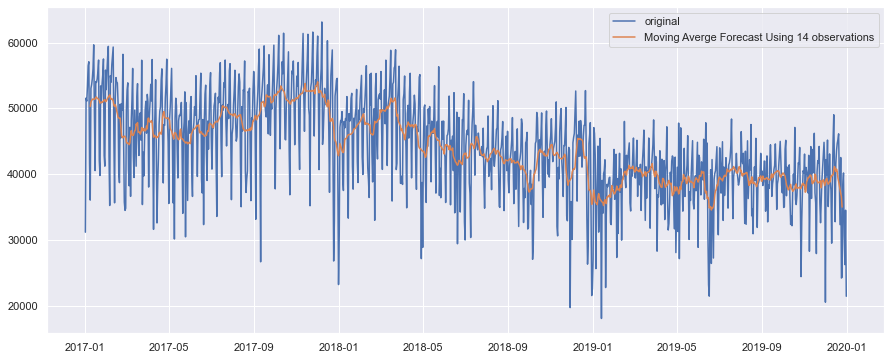

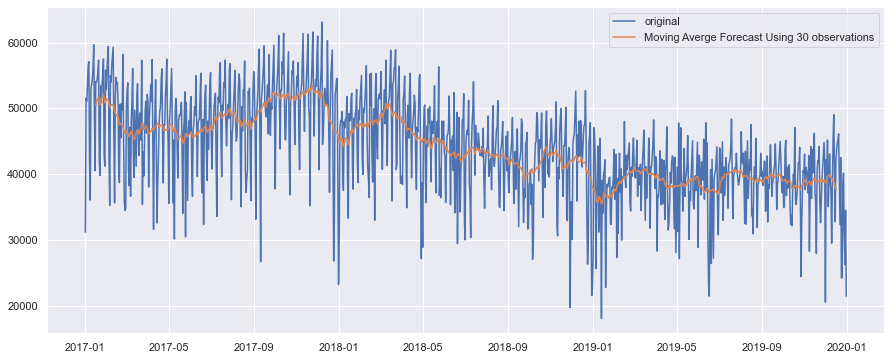

In [281]:

ventana= diario.copy()
ventana['moving_avg_forecast']=diario['cantidad_pasos'].rolling(7, center=True).mean() # promedio 7 observaciones
ventana=pd.DataFrame(ventana).set_index(diario.index.values)
plt.figure(figsize = (15,6))
plt.plot(diario['cantidad_pasos'], label='original')
plt.plot(ventana['moving_avg_forecast'], label= 'Moving Averge Forecast Using 7 observations')
plt.legend(loc='best')
plt.show()

ventana= diario.copy()
ventana['moving_avg_forecast']=diario['cantidad_pasos'].rolling(14, center=True).mean() # promedio quincena 
ventana=pd.DataFrame(ventana).set_index(diario.index.values)
plt.figure(figsize = (15,6))
plt.plot(diario['cantidad_pasos'], label='original')
plt.plot(ventana['moving_avg_forecast'], label= 'Moving Averge Forecast Using 14 observations')
plt.legend(loc='best')
plt.show()

ventana= diario.copy()
ventana['moving_avg_forecast']=diario['cantidad_pasos'].rolling(30, center=True).mean() # promedio mensual
ventana=pd.DataFrame(ventana).set_index(diario.index.values)
plt.figure(figsize = (15,6))
plt.plot(diario['cantidad_pasos'], label='original')
plt.plot(ventana['moving_avg_forecast'], label= 'Moving Averge Forecast Using 30 observations')
plt.legend(loc='best')
plt.show()


**Descomposición de la serie**

A continuación se gráfica la descomposición de la serie, para así poder identificar y calcular los diversas componentes existentes, su tendencia, estacionalidad residuos. Se utiliza un modelo aditivo, apropiado cuando la magnitud de las fluctuaciones estacionales de la serie no varíaa al hacerlo la tendencia.

Así, al analizar el comportamiento a largo plazo de la serie, se puede observar una tendencia negativa que, como se mencionó con anteiroridad, tiene que ver con esta disminución del flujo de tráfico diario, al menos, para los pagos en efectivo. Por lo tanto, la dirección global que va tomando la serie es decreciente.

También, al estudiar el comportamiento periódico de la serie, se aprecian esos ciclos mencionados previamente, como procesos que tienen comportamientos repetitivos a lo largo del tiempo.

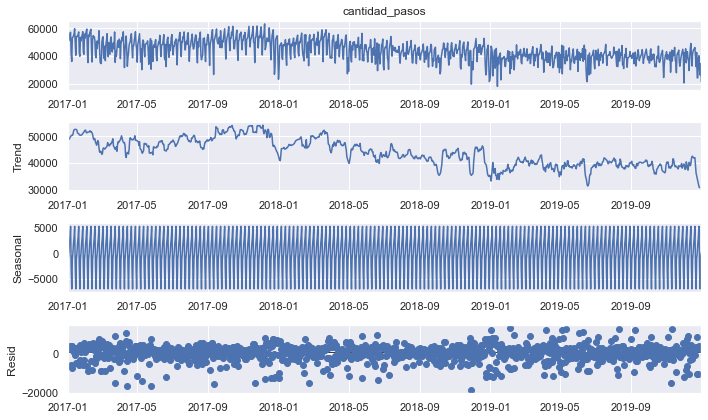

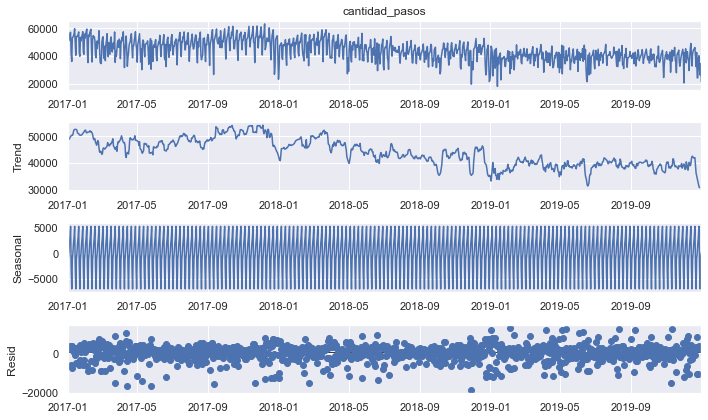

In [282]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='aditive')
result.plot()

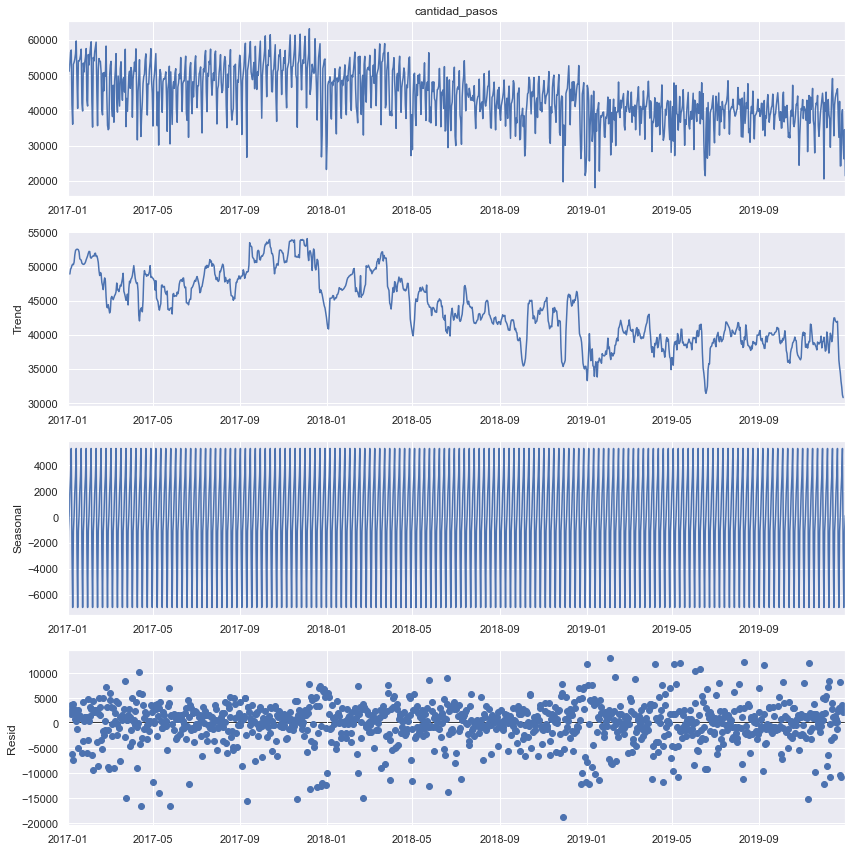

In [283]:
import matplotlib 
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

**Histograma de los residuos**

Por útltimo, se realiza un histograma para obervar los residuos y, al graficarlo, puede observarse que los mismos adoptan una distribución casi asimétrica negativa.

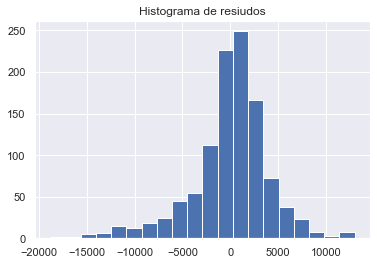

In [284]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.title("Histograma de resiudos", fontsize = 12)
plt.show()

**Dickey-Fuller test**

Con el fin de determinar las propiedades de estacionariedad de la serie se aplica el Test de Dickey Fuller, y se puede afirmar que la misma se trata de una serie no estacionaria, es decir, que la media y la varianza no son constantes en el tiempo.

In [285]:
#Augmented Dickey-Fuller test 
from statsmodels.tsa.stattools import adfuller
X = diario.cantidad_pasos
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.708050
p-value: 0.426970
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568



Valor p> 0.05: No se rechaza la hipótesis nula (H0), los datos tienen una raíz unitaria y no son estacionarios.

valor p <= 0.05: Rechaza la hipótesis nula (H0), los datos no tienen raíz unitaria y son estacionarios.

In [286]:
X = diario.cantidad_pasos
result = adfuller(np.log(X)) #hacemos un logaritmo del valor y nos vuelve a dar que no es. 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.840356
p-value: 0.360618
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


**Análisis del Telepase como medio de pago**

A continuación se realiza la misma exploración de datos previamente efectuada pero, en este caso, se incluye al Telepase como medio de pago para ver cómo es su comportamiento a lo largo del tiempo.

In [287]:

dataset2= pd.concat([data_2019, data_2018, data_2017])
dataset2

periodo       fecha  hora_inicio  hora_fin      dia    estacion  \
0           2019  2019-01-01            0         1   Martes     Alberti   
1           2019  2019-01-01            0         1   Martes     Alberti   
2           2019  2019-01-01            0         1   Martes     Alberti   
3           2019  2019-01-01            0         1   Martes     Alberti   
4           2019  2019-01-01            0         1   Martes  Avellaneda   
...          ...         ...          ...       ...      ...         ...   
1372640     2017  2017-12-31           22        23  Domingo   Sarmiento   
1372641     2017  2017-12-31           22        23  Domingo   Sarmiento   
1372642     2017  2017-12-31           22        23  Domingo   Sarmiento   
1372643     2017  2017-12-31           23         0  Domingo   Sarmiento   
1372644     2017  2017-12-31           23         0  Domingo   Sarmiento   

           sentido tipo_vehiculo  forma_pago  cantidad_pasos  
0           Centro       Liviano  NO COBRADO              22  
1           Centro       Liviano    TELEPASE               6  
2        Provincia       Liviano  NO COBRADO              53  
3        Provincia       Liviano    TELEPASE              18  
4           Centro       Liviano    EFECTIVO              16  
...            ...           ...         ...             ...  
1372640  Provincia       Liviano  NO COBRADO               3  
1372641  Provincia       Liviano    TELEPASE              10  
1372642  Provincia        Pesado    TELEPASE               1  
1372643  Provincia       Liviano  NO COBRADO               1  
1372644  Provincia       Liviano    TELEPASE               4  

[3560706 rows x 10 columns]

In [288]:
#Nos quedamos solamente con la estación Illia y la forma de pago TELEPASE. HACER TODO LO MISMO DEL PREPROCESAMIENTO PERO CON TELEPASE PARA VER LO INVERSO

mascara=np.logical_and(dataset2.estacion=='Illia', dataset2.forma_pago=='TELEPASE')
dataset2=dataset2[mascara]

In [289]:
#Quitamos las columnas que no vamos a utilizar

dataset2.drop(columns= ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset2.head()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
20  2019-01-01         1  Martes     Centro       Liviano              59
21  2019-01-01         1  Martes     Centro        Pesado               1
23  2019-01-01         1  Martes  Provincia       Liviano             106
25  2019-01-01         1  Martes  Provincia        Pesado               2
85  2019-01-01         2  Martes     Centro       Liviano             507

In [290]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset2['fecha2'] = pd.to_datetime(dataset2.fecha) + pd.to_timedelta(dataset2.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset2.drop(columns=['fecha','hora_fin'], inplace = True)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [291]:
#Corregimos el nombre de fecha2 a fecha
dataset2.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset2.head()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


dia    sentido tipo_vehiculo  cantidad_pasos               fecha
20  Martes     Centro       Liviano              59 2019-01-01 01:00:00
21  Martes     Centro        Pesado               1 2019-01-01 01:00:00
23  Martes  Provincia       Liviano             106 2019-01-01 01:00:00
25  Martes  Provincia        Pesado               2 2019-01-01 01:00:00
85  Martes     Centro       Liviano             507 2019-01-01 02:00:00

In [292]:
#Reordenamos el dataset por fecha
dataset2.sort_values('fecha', inplace = True)
dataset2.reset_index(drop=True, inplace = True)
dataset2


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo     Centro        Pesado               9 2017-01-01 00:00:00
1       Domingo  Provincia        Pesado               3 2017-01-01 00:00:00
2       Domingo  Provincia        Pesado               7 2017-01-01 00:00:00
3       Domingo  Provincia       Liviano             275 2017-01-01 00:00:00
4       Domingo     Centro       Liviano             459 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
204607   Martes  Provincia       Liviano             600 2019-12-31 22:00:00
204608   Martes     Centro       Liviano             630 2019-12-31 22:00:00
204609   Martes  Provincia       Liviano             110 2019-12-31 23:00:00
204610   Martes     Centro       Liviano             122 2019-12-31 23:00:00
204611   Martes  Provincia        Pesado               1 2019-12-31 23:00:00

[204612 rows x 5 columns]

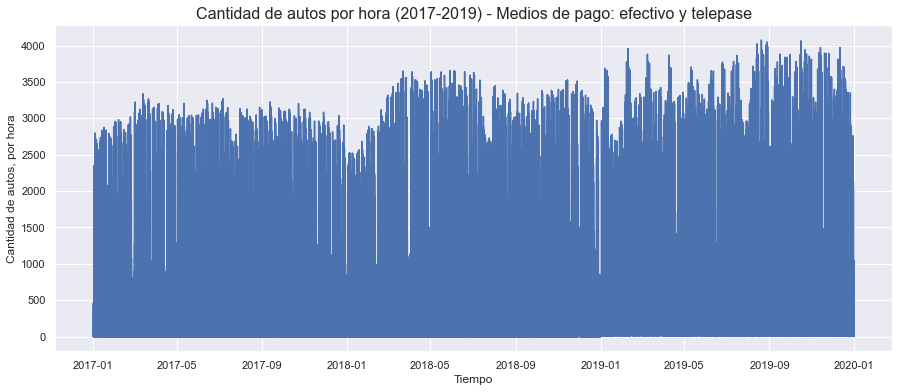

In [293]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset2.fecha, dataset2.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title("Cantidad de autos por hora (2017-2019) - Medios de pago: efectivo y telepase", fontsize = 16)
plt.show()

In [294]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario2 = dataset2.resample('D', on = 'fecha').sum()
print(diario2.shape)
diario2.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           12326
2017-01-02           35621
2017-01-03           39390
2017-01-04           40294
2017-01-05           41373

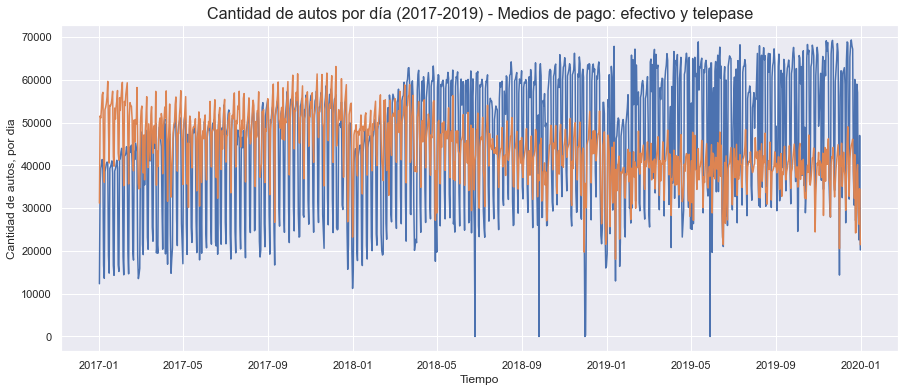

In [295]:
plt.figure(figsize = (15,6))
plt.plot(diario2.index, diario2.cantidad_pasos)
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de autos por día (2017-2019) - Medios de pago: efectivo y telepase", fontsize = 16)
plt.show() #en la comparación de efectivo y telepase, vemos lo opuesto

En esta última sección, se realizó solamente la exploración de la serie, incluyendo al telepase como medio de pago. Pudo observarse que, mientras que la tendencia es decreciente al observar el comportamiento de los pagos en efectivo, la tendencia de los pagos con telepase es notoriamente creciente, por lo cual no es tanto una cuestión de disminución del flujo de vehículos, sino que en realidad se produce una mutación en estas formas de abonar.

### Predicción a Futuro

A continuación, se procede a realizar un modelo benchmark, un one-step y multi-step prediction, y se trabaja con Random Forest como modelo para evaluar resultados.

Se utiliza el dataset con los registros diarios para los años 2017, 2018 y 2019, con el cual se realizó la exploración de datos y análisis posterior.

**Métrica a utilizar para la evaluación de modelos:** 

La métrica que se va a utilizar para evaluar los resultados del modelo es la raíz del error cuadrático medio (`RMSE`) y el coeficiente de determinación (`R2`), dado que ambos son útiles para describir qué tan "bueno" es un modelo para hacer predicciones. Con el r2,al tomar valores que van del 0 al 1, se pretende también tener valores que sean más "simples" de analizar a la hora de comparar los valores para el conjunto de datos de `train` y para el conjunto de datos de `test`.

Al ser la variable a predecir el flujo diario, la misma puede tomar valores muy altos y, por eso, para facilitar su interpretación, no sólo se trabaja con la raíz del error cuadrático medio, sino que también se utiliza el R2.

In [296]:
diario.head()

cantidad_pasos
fecha                     
2017-01-01         31183.0
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0

In [297]:
diario.shape

(1095, 1)

In [298]:
look_back=90*1 #usamos x dias de datos para predecir el valor siguiente

In [299]:
N=diario.shape[0]
X= np.zeros((N-look_back-1, look_back))
y= np.zeros(N-look_back-1)

print(X.shape, y.shape)

(1004, 90) (1004,)


In [300]:
N-365-1

729

In [301]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = diario.values[i:i+look_back].ravel()
    y[i] = diario.values[i+look_back]

In [302]:
N_train = 2*365 - look_back # cantidad de instancias que vamos a usar para entrenar, entrena con los 2 primeros años
N_test = 1*365 #cantidad de intancias que vamos a usar para evaluar, en este caso con último año
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(640, 90) (640,)
(364, 90) (364,)


**Benchmark**: comparamos el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterior.

In [303]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

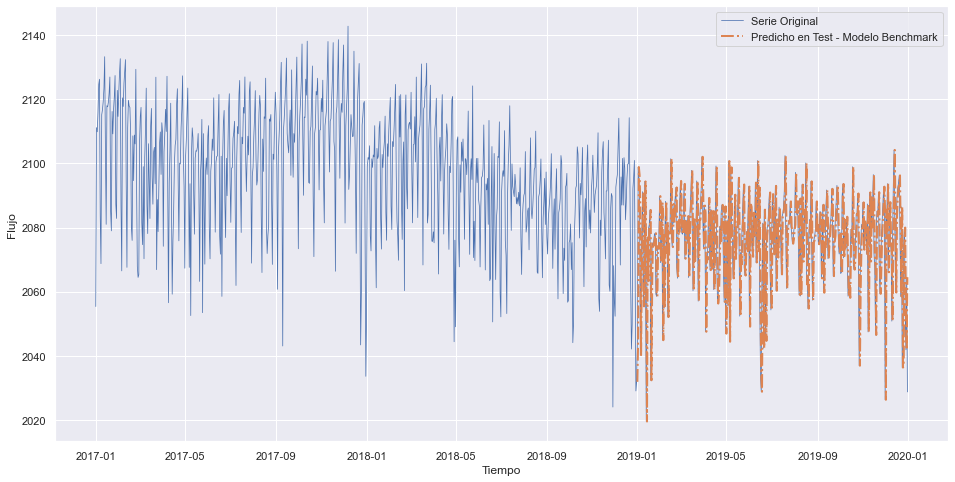

In [304]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test - Modelo Benchmark')
plt.plot(diario.index[N_train+look_back-1], diario.index[length_total-1])
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()


In [305]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [306]:
y_test_pred_benchmark = y[-1 + N_train-1:N_train-1+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train-1+N_test - 1])

print(np.sqrt(MSE))

6637.327662316175


In [307]:
MSE = mean_squared_error(y_test, y_test_pred_benchmark[:-1])
MSE

55034803.38156288

### RandomForestRegressor

**One-Step Prediction**

Se va a entrenar un `RandomForestRegressor` para predecir el siguiente valor en la serie de tiempo. Se utilizan los dos primeros años como conjunto de entrenamiento, y el último año como conjunto de evaluación.

In [308]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs = 4).fit(X_train,y_train)

Predecimos

In [309]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [310]:
diario.index[N_train+look_back:length_total].shape

(365,)

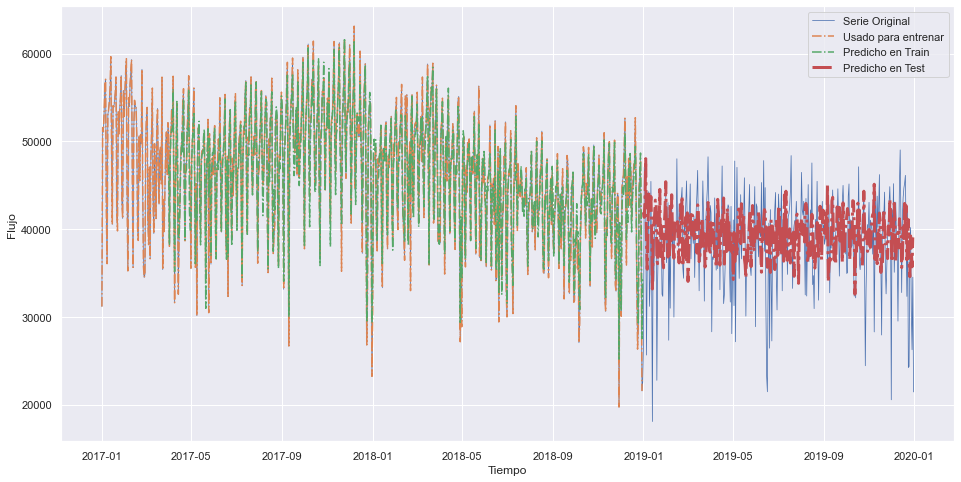

In [311]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train+look_back-1], diario[:N_train+look_back-1], '-.', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back+N_train], y_train_pred,'-.', label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

Graficamos la importancia de cada feature

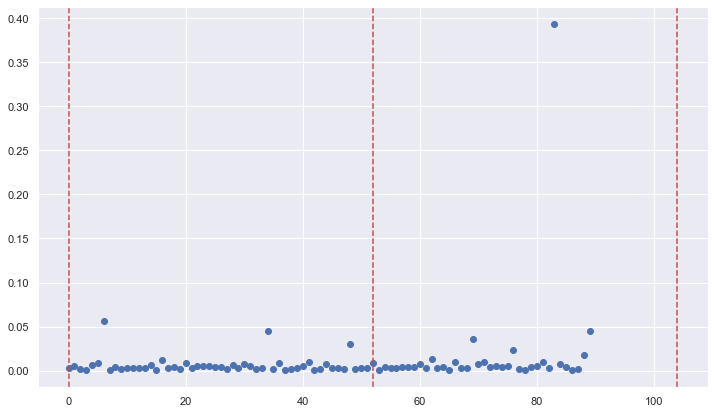

In [312]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(3)*52:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

In [313]:
rf.feature_importances_

array([0.00287951, 0.00478373, 0.00229109, 0.00071909, 0.00644366,
       0.00834365, 0.05655032, 0.00072599, 0.00386558, 0.00209719,
       0.00329853, 0.00274462, 0.0027112 , 0.0028825 , 0.00642498,
       0.0011498 , 0.01192526, 0.00343021, 0.00386601, 0.00186285,
       0.0088091 , 0.00300783, 0.00534263, 0.004853  , 0.00498682,
       0.00368579, 0.0042079 , 0.00217812, 0.00611139, 0.00334566,
       0.0071279 , 0.00532793, 0.00170644, 0.00298181, 0.04469834,
       0.00217189, 0.0091355 , 0.00112234, 0.00137304, 0.00288689,
       0.00521687, 0.01004886, 0.0007478 , 0.00151159, 0.00786555,
       0.00325603, 0.00329969, 0.00209533, 0.02992375, 0.00174949,
       0.0026754 , 0.00305994, 0.00922968, 0.00121895, 0.00444151,
       0.00313416, 0.00247998, 0.00396151, 0.00433003, 0.00466986,
       0.00746765, 0.0024929 , 0.0134487 , 0.00323954, 0.00432901,
       0.00120934, 0.00989356, 0.00289449, 0.0032104 , 0.03639273,
       0.00736011, 0.00940894, 0.00444077, 0.00558982, 0.00390

**Feature importances:** Al graficar la importancia de los distintos features, puede observarse que, para el modelo, lo que más importa a la hora de predecir es el día anterior y el mismo día de la semana anterior. Al tener los valores numéricos, y considerando el look back definido (90), puede apreciarse esto mencionado, al ver que los registros que tomen valores más altos y, por ende son más importantes a la hora de predecir, se ubican en las posiciones 89 y 83.

In [314]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 2087.141042929681
Error en Test: 5238.911295533011


In [315]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'r2 en Train: {r2_train}')
print(f'r2 en Test: {r2_test}')

r2 en Train: 0.9153900953063242
r2 en Test: -0.0687248509769649


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


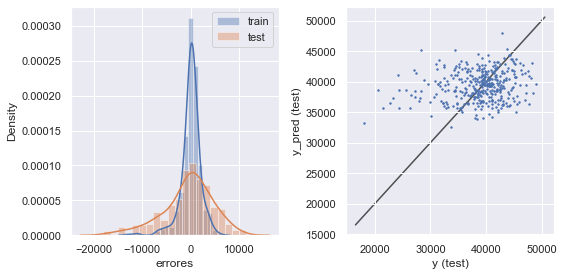

In [316]:
# Gráfico de valores reales y valores predichos para Random Forest
    
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
    
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

**Multi-Step Prediction**

Con el modelo ya entrenado, vamos a usar el método recursivo para hacer Multi-Step prediction.

In [317]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)# re-del ultimo valor
y_ms_test_pred = np.array(y_ms_test_pred)

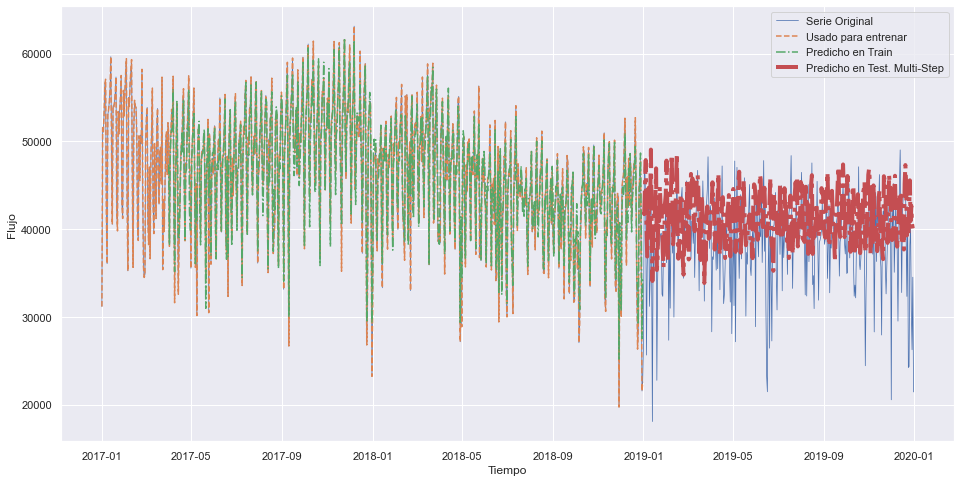

In [318]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train + look_back], diario[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total-1], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

Y calculamos el error RMSE y r2

In [319]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 2087.141042929681
Error en Test: 5238.911295533011


In [320]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'r2 en Train: {r2_train}')
print(f'r2 en Test: {r2_test}')

r2 en Train: 0.9153900953063242
r2 en Test: -0.0687248509769649


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


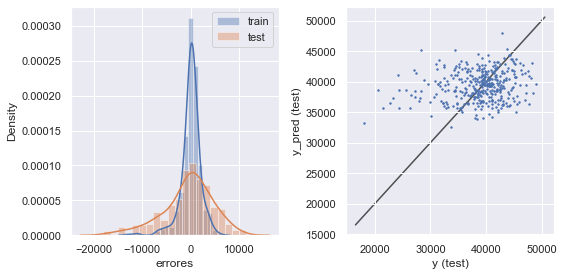

In [321]:
# Gráfico de valores reales y valores predichos para Random Forest
    
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
    
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

## CV time series

A continuación, se realiza un Grid Search para efectuar la optimización de modelos pero, en este caso, se trabaja con un regresor de XGBoost. La idea detrás del boosting es generar múltiples modelos de predicción “débiles” secuenciualmente,y que cada uno de estos tome los resultados del modelo anterior, para generar un modelo más “fuerte”, con mejor poder predictivo y mayor estabilidad en sus resultados. Con esto, se buscará entrenar un modelo que tenga un mejor rendimiento en comparación al Random Forest evaluado en la sección anterior.


In [322]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [323]:
model=xgb.XGBRegressor()
param_search= {'max_depth': [3,5]}

tscv = TimeSeriesSplit(n_splits = 3)
grid_search= GridSearchCV(estimator=model, cv=tscv, scoring='neg_mean_squared_error',
                             param_grid=param_search)

grid_search.fit(X_train, y_train)



GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                    

In [324]:
model.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [325]:
print("Mejores parametros: "+str(grid_search.best_params_))
print("Mejor Score: "+str(grid_search.best_score_)+'\n')

scores = pd.DataFrame(grid_search.cv_results_)
scores

Mejores parametros: {'max_depth': 5}
Mejor Score: -34657029.757575996



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.158879      0.013542         0.006641        0.001665   
1       0.222289      0.055993         0.005001        0.000817   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               3  {'max_depth': 3}      -4.672432e+07      -3.059242e+07   
1               5  {'max_depth': 5}      -4.424274e+07      -2.929754e+07   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  
0      -3.260885e+07    -3.664186e+07    7.176744e+06                2  
1      -3.043081e+07    -3.465703e+07    6.793892e+06                1

In [326]:
y_train_pred= grid_search.predict(X_train)
y_test_pred= grid_search.predict(X_test)

In [327]:
y_train_pred.shape

(640,)

In [328]:
y_test_pred.shape

(364,)

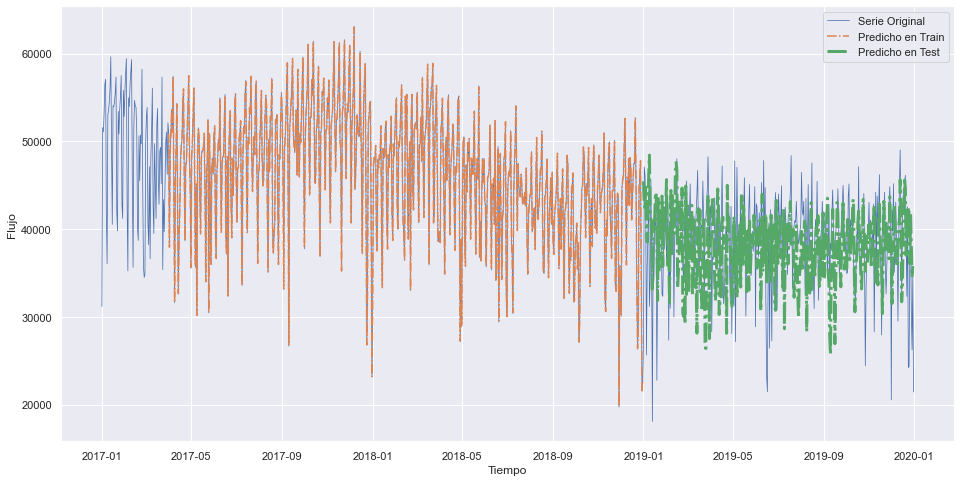

In [329]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

In [330]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

Error en Train: 57.49896571236376


In [331]:
MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Test: 6338.972328921977


In [332]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'r2 en Train: {r2_train}')
print(f'r2 en Test: {r2_test}')

r2 en Train: 0.9999357848244114
r2 en Test: -0.5646655834586789


**Aclaración sobre feature importances:** Luego de realizar el GridSearch, se trabaja con shap para verificar lo mencionado con anterioridad sobre la información que utilizan los modelos a la hora de predecir y, efectivamente, con esta técnica vuelve a comprobarse que unos de los días que tienen más peso a la hora de entrenar y predecir con los modelos son: el mismo día de la semana anterior (83), y el día anterior (89).

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


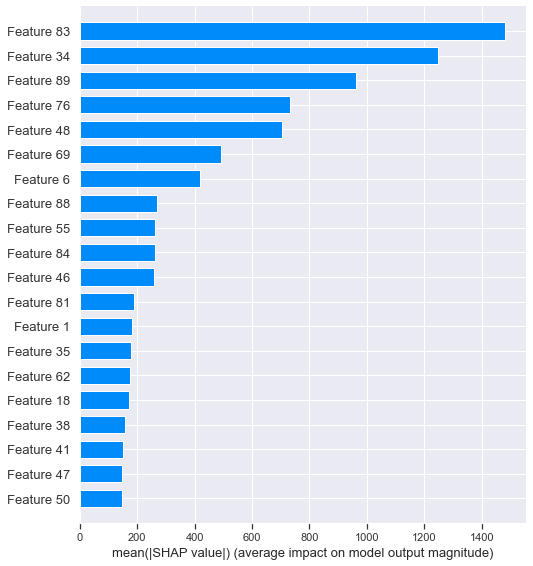

In [333]:
import shap

model=grid_search.best_estimator_
shap_values= shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

**Incorporación de datos previos al 2017:** Dado el comportamiento de la serie y al analizar su descomposición, se estima que aún agregando datos de años anteriores, no van a haber diferencias significativas en el rendimiento de los modelos.

## Interpretación de modelos

**Comparación y elección de modelos - Distribución de errores y análisis de gráficos**

Comparando los modelos entrenados en el proyecto, elegiría por su desempeño al Random Forest del One-Step Prediction. Aún así, al analizar la distribución de errores, se puede observar una nube de puntos acotada, por lo cual podría afirmarse que estos modelos tienen problemas para estimar valores bajos y valores altos. Aunque las métricas para evaluar el conjunto de train tienen valores altos, por ejemplo, para r2 (0.95), la brecha con el conjunto de test (r2=0) es demasiado amplia. Por eso, puede decirse que se trata de una variable con mucha dinámica, con mucha variación, y hay un error que, seguramente, es irreducible.

En definitiva, ninguno de los modelos es bueno para estimar el flujo diario. Y, si bien estiman bien los ciclos, no son buenos a la hora de estimar magnitudes.

Al realizar el GridSearch para un XGBoost se obtienen valores más altos de r2 para el conjunto de train (0.99), pero no se elige este modelo porque, a veces,  métricas mas bajas en el train ayuda a que generalice mejor después en el test. Aún al tener como mejor parámetro un max_depth de 5, sigue siendo mejor en términos de rendimiento, el Random Forest previemanete mencionado, es mejor, incluso con sus hiperparámetros por defecto.

Además, los niveles de error y gráficas mejoran en el One-Step Prediction en relación al modelo Benchmark dado que, en el Random Forest seleccionado, se aprecia cómo la estimación es mucho mejor que "copiarse" los datos del día anterior. 

Al trabajar con todos los modelos, en definitiva, se observa que los datos tienen demasiada dispersión incluso en una semana.


## Predicción 2020


A continuación, se importa el dataset del año 2020 y se procede a procesar los datos para luego incorporarlos al modelo creado con un One-Step Prediction, y así predecir el tráfico para el 2020.

In [334]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')


In [335]:
data_2020.head()

periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
1   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
2   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
3   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
4   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

   hora_fin estacion tipo_vehiculo forma_pago  \
0       1.0  ALBERDI          Auto   Efectivo   
1       1.0  ALBERDI          Auto   Efectivo   
2       1.0  ALBERDI          Auto  Rec.Deuda   
3       1.0  ALBERDI          Auto  Rec.Deuda   
4       1.0  ALBERDI          Auto  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  
0                          Efectivo     Centro            24.0  
1                          Efectivo  Provincia            80.0  
2                Paso en Infracción  Provincia             1.0  
3  Paso en infracción con Multa LPR     Centro             1.0  
4  Paso en infracción con Multa LPR  Provincia             1.0

In [336]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
data_2020_reducido = data_2020[mask]

#Quitamos las columnas que no vamos a utilizar
data_2020_reducido.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion', 'dia', 'dia_fecha', 'mes', 'observacion'], inplace = True)

data_2020_reducido.reset_index(inplace=True, drop=True)

data_2020_reducido.head()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


fecha  hora_fin tipo_vehiculo    sentido  cantidad_pasos
0  2020-01-01 00:00:00       1.0          Auto     Centro           326.0
1  2020-01-01 00:00:00       1.0          Auto  Provincia           319.0
2  2020-01-01 00:00:00       2.0          Auto     Centro           199.0
3  2020-01-01 00:00:00       2.0          Auto  Provincia           180.0
4  2020-01-01 00:00:00       3.0          Auto     Centro           114.0

In [337]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2020_reducido['fecha2'] = pd.to_datetime(data_2020_reducido.fecha) + pd.to_timedelta(data_2020_reducido.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
data_2020_reducido.drop(columns=['fecha','hora_fin'], inplace = True)

data_2020_reducido.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


tipo_vehiculo    sentido  cantidad_pasos              fecha2
0          Auto     Centro           326.0 2020-01-01 01:00:00
1          Auto  Provincia           319.0 2020-01-01 01:00:00
2          Auto     Centro           199.0 2020-01-01 02:00:00
3          Auto  Provincia           180.0 2020-01-01 02:00:00
4          Auto     Centro           114.0 2020-01-01 03:00:00

In [338]:
#Corregimos el nombre de fecha2 a fecha
data_2020_reducido.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data_2020_reducido.head()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


tipo_vehiculo    sentido  cantidad_pasos               fecha
0          Auto     Centro           326.0 2020-01-01 01:00:00
1          Auto  Provincia           319.0 2020-01-01 01:00:00
2          Auto     Centro           199.0 2020-01-01 02:00:00
3          Auto  Provincia           180.0 2020-01-01 02:00:00
4          Auto     Centro           114.0 2020-01-01 03:00:00

In [339]:
#Reordenamos el dataset por fecha
data_2020_reducido.sort_values('fecha', inplace = True)
data_2020_reducido.reset_index(drop=True, inplace = True)
data_2020_reducido


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


tipo_vehiculo    sentido  cantidad_pasos               fecha
0                Moto     Centro             7.0 2020-01-01 00:00:00
1                Auto  Provincia           423.0 2020-01-01 00:00:00
2                Auto     Centro           467.0 2020-01-01 00:00:00
3                Moto  Provincia             6.0 2020-01-01 00:00:00
4      Pesados 2 Ejes     Centro             1.0 2020-01-01 00:00:00
...               ...        ...             ...                 ...
52369            Auto  Provincia           222.0 2020-12-31 20:00:00
52370            Auto  Provincia           106.0 2020-12-31 21:00:00
52371            Moto     Centro             5.0 2020-12-31 21:00:00
52372            Moto  Provincia             1.0 2020-12-31 21:00:00
52373            Auto     Centro           103.0 2020-12-31 21:00:00

[52374 rows x 4 columns]

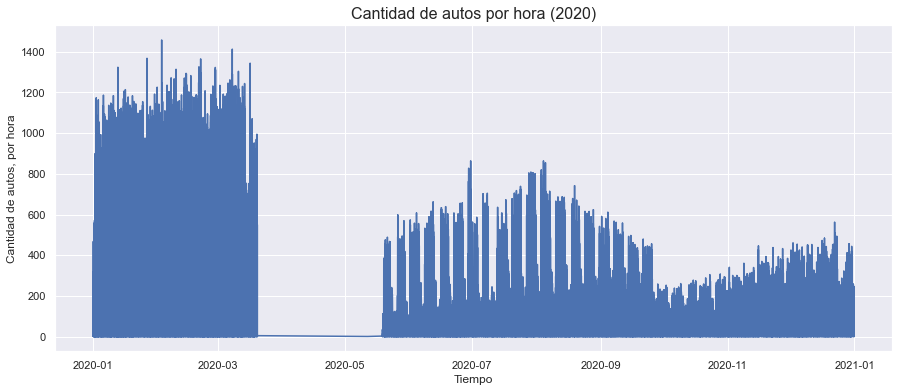

In [340]:
#Graficamos nuestros datos, tal como están, sólo para el 2020
plt.figure(figsize = (15,6))
plt.plot(data_2020_reducido.fecha, data_2020_reducido.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title("Cantidad de autos por hora (2020)", fontsize = 16)
plt.show()

In [341]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario2020 = data_2020_reducido.resample('D', on = 'fecha').sum()
print(diario2020.shape)
diario2020.head()

(366, 1)


cantidad_pasos
fecha                     
2020-01-01         21395.0
2020-01-02         33722.0
2020-01-03         37067.0
2020-01-04         30627.0
2020-01-05         27812.0

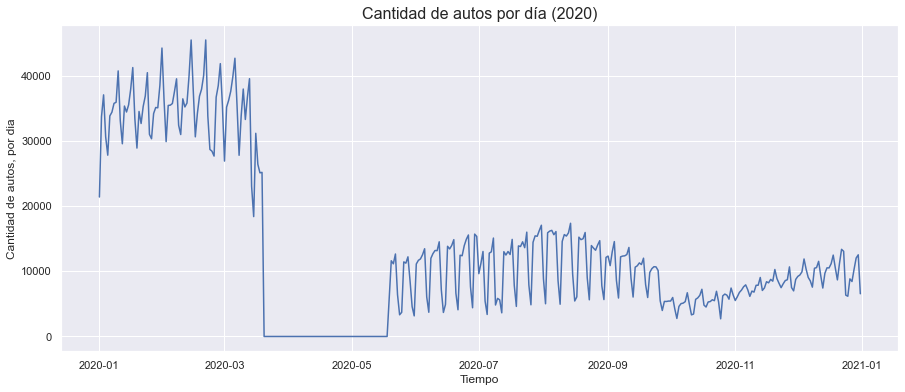

In [342]:
plt.figure(figsize = (15,6))
plt.plot(diario2020.index, diario2020.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de autos por día (2020)", fontsize = 16)
plt.show()

En los gráficos de flujo por hora y día previamente visualizados, puede observarse cómo disminuye el tráfico a partir del mes de marzo cuando comienza el Aislamiento Social, Preventivo y Obligatorio (ASPO) decretado por el gobierno argentino, junto a un paquete de medidas restrictivas en materia de ciruclación. Inlcuso, hasta el mes de mayo, puede apreciarse cómo se obtienen valores casi nulos dada la liberación de peajes que tuvo lugar en muchas estaciones del Área Metropolitna de Buenos Aires (AMBA) por la pandemia y consecuente cuarentena impuesta.

In [343]:
serie_total=pd.concat([diario, diario2020])
serie_total.head()

cantidad_pasos
fecha                     
2017-01-01         31183.0
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0

Text(0.5, 1.0, 'Cantidad de pasos según año')

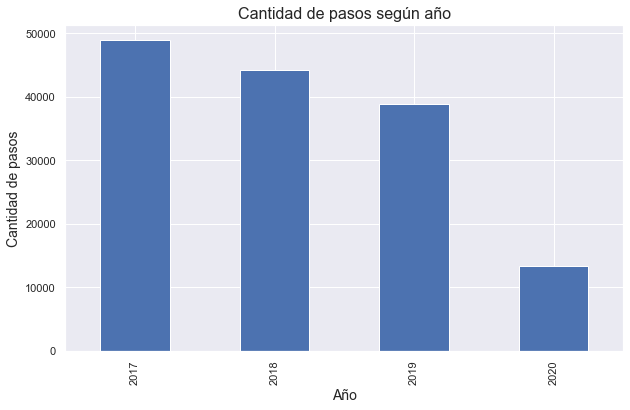

In [344]:
#Year wise count
serie_total.reset_index(inplace=True)

plt.figure(figsize = (10,6))
serie_total.groupby(serie_total.fecha.dt.year)['cantidad_pasos'].mean().plot.bar()
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.title("Cantidad de pasos según año", fontsize = 16)

Dado el contexto previamente mencionado para el año 2020, puede observarse cómo disminuye el promedio de casos diarios para los distintos años, alacanzando valores extremos para 2020. Puede pensarse que más allá del cambio en la forma de pago, esto se debe al contexto sanitario.

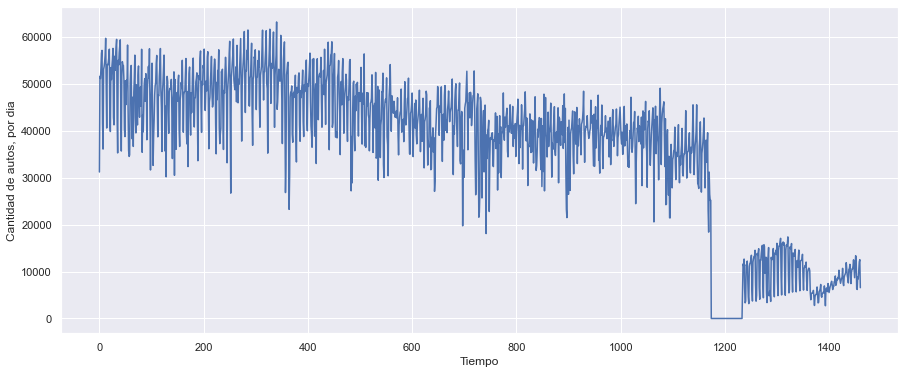

In [345]:
plt.figure(figsize = (15,6))
plt.plot(serie_total.index, serie_total.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

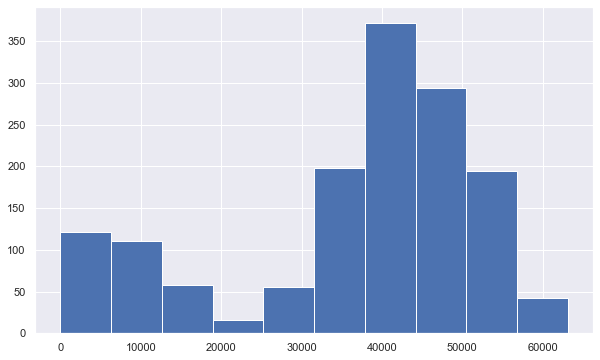

In [346]:
#Histograma para ver cómo es la distribución de la cantidad de pasos por día
plt.figure(figsize = (10,6))
plt.hist(serie_total.cantidad_pasos)
plt.show()

**Predicción a futuro**

**One-Step Prediction**

In [347]:
serie_total=pd.concat([diario, diario2020])
serie_total.head()

cantidad_pasos
fecha                     
2017-01-01         31183.0
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0

In [348]:
look_back=90*1 

In [349]:
look_back

90

In [350]:
N=serie_total.shape[0]
X= np.zeros((N-look_back-1, look_back))
y= np.zeros(N-look_back-1)

print(X.shape, y.shape)

(1370, 90) (1370,)


In [351]:
for i in range(X.shape[0]):
    X[i,:] = serie_total.values[i:i+look_back].ravel()
    y[i] = serie_total.values[i+look_back]
    

In [352]:
diario1=serie_total.values[i:i+look_back].ravel()
np.shape(diario1)

(90,)

In [353]:
N_train = 3*365 - look_back
N_test = 1*365 
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(1005, 90) (1005,)
(365, 90) (365,)


In [354]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [355]:
X_train

array([[31183., 51568., 51093., ..., 51074., 46235., 52127.],
       [51568., 51093., 53332., ..., 46235., 52127., 50995.],
       [51093., 53332., 56486., ..., 52127., 50995., 38045.],
       ...,
       [37170., 39669., 34943., ..., 38168., 40182., 30681.],
       [39669., 34943., 35054., ..., 40182., 30681., 26259.],
       [34943., 35054., 43775., ..., 30681., 26259., 34523.]])

In [356]:
y_train_pred

array([47352.9       , 38278.6       , 47794.5       , ...,
       35702.56666667, 39056.7       , 33251.8       ])

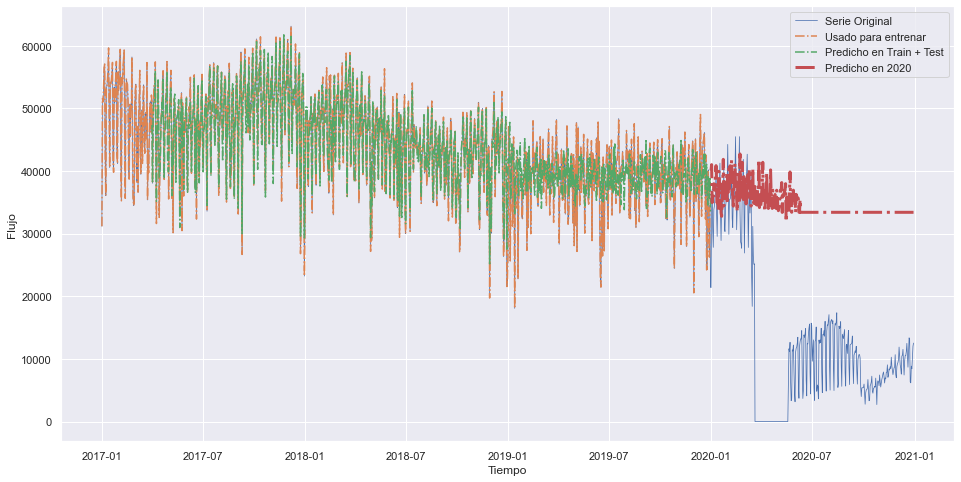

In [357]:
plt.figure(figsize=(16,8))
plt.plot(serie_total.index[:length_total], serie_total[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie_total.index[:N_train+look_back-1], serie_total[:N_train+look_back-1], '-.', label = 'Usado para entrenar')
plt.plot(serie_total.index[look_back: look_back+N_train], y_train_pred,'-.', label = 'Predicho en Train + Test')
plt.plot(serie_total.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 3, label = 'Predicho en 2020')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

**Análisis para el modelo con datos del 2020 incorporados:**

En primer lugar, puede afirmarse que al incorporar al análisis de datos los registro del 2020, lo que se observan no son outliers, sino que los valores difiere en gran medida a los trabajados para la muestra de los años 2017, 2018 y 2019. 

Al graficar las predicciones, se aprecia cómo las estimaciones de lo predicho en 2020 se alejan de la serie original, e incluso, empeora esa capacidad predictiva en relación a los años anteriores.

Además, alrededor del mes de julio, llega un punto en el que lo predicho en 2020 se tornan constantes, tomando valores mínimos. Esto puede ser debido a que el look back de los datos empieza a utilizar observaciones que ya están fuera de rango con lo que se había entrenado (marzo-mayo). Y así, ya asumimos que no sse va a poder estimar con un alto rendimiento.


**Random Forest 2020**

Finalmente, se entrena un modelo de Random Forest como el seleccionado con anterioridad, pero incorporando los datos del 2020. 

Al evaluarlo, se observan resultados más bajos para los valores del conjunto train (0.72), aún cuando se reduce la brecha exisitente con el conjunto test. Puede pensarse que, dado lo atípico de los datos del año 2020, el rendimiento del modelo es incluso peor a los trabajados con anterioridad.

Al mirar la importancia de los distintos features, en este caso también se aprecia cómo se marcan los ciclos semanales y el peso qué tiene tanto el día anterior, como el mismo día de la semana anterior, a la hora de predecir.

In [358]:
rf_total = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs = 4, max_depth=5).fit(X_train,y_train)

In [359]:
y_pred = rf_total.predict(X)
y_train_pred = rf_total.predict(X_train)
y_test_pred = rf_total.predict(X_test)

In [360]:
serie_total.index[N_train+look_back:length_total].shape

(365,)

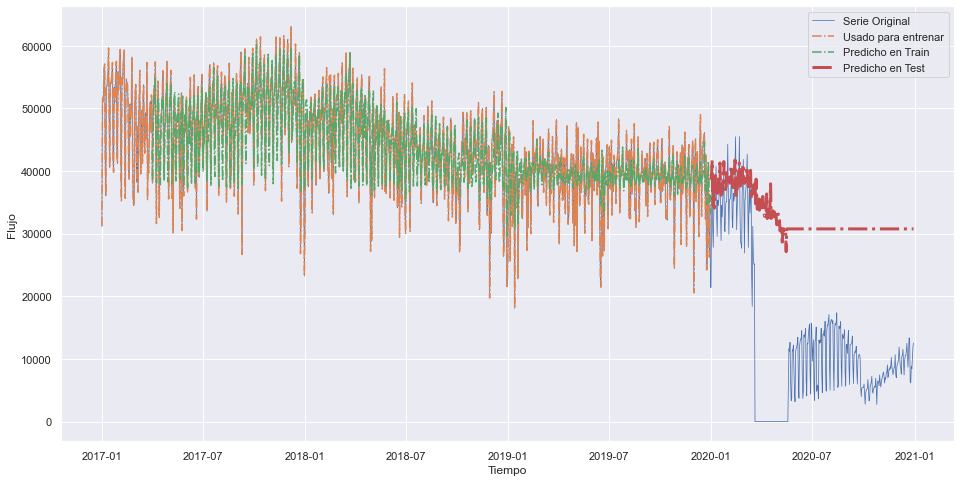

In [361]:
plt.figure(figsize=(16,8))
plt.plot(serie_total.index[:length_total], serie_total[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie_total.index[:N_train+look_back-1], serie_total[:N_train+look_back-1], '-.', label = 'Usado para entrenar')
plt.plot(serie_total.index[look_back: look_back+N_train], y_train_pred,'-.', label = 'Predicho en Train')
plt.plot(serie_total.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

Graficar la importancia de cada feature

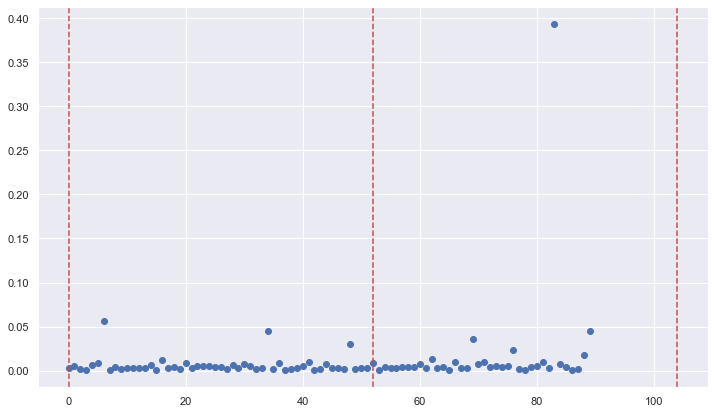

In [362]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(3)*52:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

In [363]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 3866.4937861195403
Error en Test: 21821.60814092968


In [364]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'r2 en Train: {r2_train}')
print(f'r2 en Test: {r2_test}')

r2 en Train: 0.7288490473104543
r2 en Test: -2.190150324724877


### Para pensar, investigar y, opcionalmente, implementar

1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?

Incorporaría los atributos categóricos (tipo de vehículo, forma de pago, etc) llevándolos a una forma numérica con encoders para poder usarlos en el entrenamiento y evaluación de modelos. Viendo cómo cambiaba la tendencia global de la serie cuando se incorporó una nueva forma de pago, pienso qué podrían mejorar las predicciones.


2. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?

Estimo que el comportamiento de las predicciones entre las distintas estaciones puede ser similar. Sin embargo, buscaría cómo información adicional cuáles son los puntos que esas estaciones conectan para ver si alguna es una ruta turística, lo que quizás tenga cierto peso en la comparación al tener un mayor flujo que el de las autopistas usadas simplemente para movilizarse a lugares de trabajo o domicilios particulares.

3. ¿Hay algo que te gustaría investigar o probar?

En un futuro proyecto, me gustaría probar este mismo flujo de trabajo pero incorporando el Telepase como forma de pago para ver cuál es el rendimiento de los modelos. Cuando esto se incluyó en la exploración de datos se observó como la tendencia de la serie era creciente, y me gustaría saber si trabajar con la serie total es una posibilidad a la hora de generar una mejor predicción.

# Proyecto 04 - Profundización sobre Series de Tiempo


En este Proyecto 04, se buscará trabajar con una serie estacionaria, suavizando la misma y trabajando con un resampleo semanal, diferente al flujo diario previamente abordado. Así también, se intentará incorporar otros medios de pago para estudiar la tendencia de la serie, y observar si realmente era decreciente, o si se debía a un cambio en las formas de pago, que no afecta el tráfico global.

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#### Análisis exploratorio y preprocesamiento de los datos

In [366]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

Se imprimen los valores que toma el campo **forma_pago**

In [367]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


In [368]:
# Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas:
dataset = pd.concat([data_2019, data_2018, data_2017])

# Nos quedamos solamente con la estación Illia y, en este caso, con todos los medios de pago, que son distintos y varían entre los años a estudiar:
dataset = dataset[(dataset.estacion == 'Illia')]

# Quitamos las columnas que no vamos a utilizar:
dataset.drop(columns = ['periodo', 'hora_inicio', 'forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
19  2019-01-01         1  Martes     Centro       Liviano             146
20  2019-01-01         1  Martes     Centro       Liviano              59
21  2019-01-01         1  Martes     Centro        Pesado               1
22  2019-01-01         1  Martes  Provincia       Liviano             147
23  2019-01-01         1  Martes  Provincia       Liviano             106

In [369]:
# Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora:
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

# Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2:
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
19  Martes     Centro       Liviano             146 2019-01-01 01:00:00
20  Martes     Centro       Liviano              59 2019-01-01 01:00:00
21  Martes     Centro        Pesado               1 2019-01-01 01:00:00
22  Martes  Provincia       Liviano             147 2019-01-01 01:00:00
23  Martes  Provincia       Liviano             106 2019-01-01 01:00:00

In [370]:
# Corregimos el nombre de fecha2 a fecha:

dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
19  Martes     Centro       Liviano             146 2019-01-01 01:00:00
20  Martes     Centro       Liviano              59 2019-01-01 01:00:00
21  Martes     Centro        Pesado               1 2019-01-01 01:00:00
22  Martes  Provincia       Liviano             147 2019-01-01 01:00:00
23  Martes  Provincia       Liviano             106 2019-01-01 01:00:00

In [371]:
# Reordenamos el dataset por fecha:

dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo     Centro       Liviano             459 2017-01-01 00:00:00
1       Domingo  Provincia        Pesado               3 2017-01-01 00:00:00
2       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               7 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
752547   Martes     Centro       Liviano             122 2019-12-31 23:00:00
752548   Martes     Centro       Liviano               3 2019-12-31 23:00:00
752549   Martes     Centro       Liviano               4 2019-12-31 23:00:00
752550   Martes     Centro       Liviano               1 2019-12-31 23:00:00
752551   Martes     Centro       Liviano             214 2019-12-31 23:00:00

[752552 rows x 5 columns]

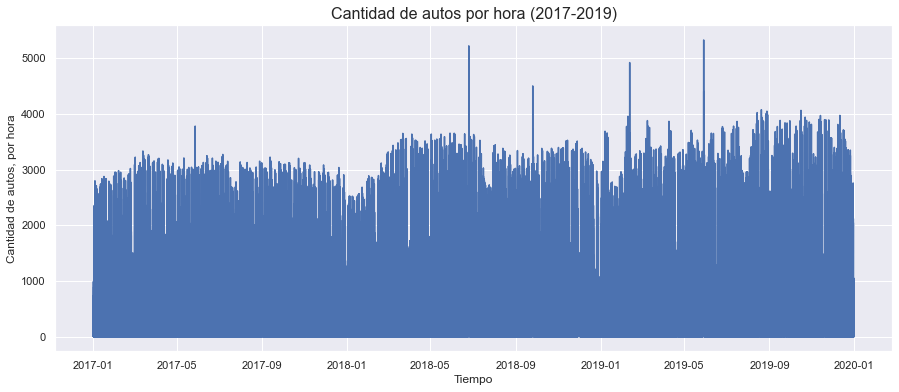

In [372]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title("Cantidad de autos por hora (2017-2019)", fontsize = 16)
plt.show()

**Resampleo semanal**

A continuación, se realiza un procedimiento para resamplear la serie según la cantidad de pasos por semana. Dadas las observaciones obtenidas al trabajar con un dataset con registros diarios en el Proyecto 03, se decide buscar una una visualización más amigable, con una menor cantidad de instancias y que, probablemente, permita alcanzar un mejor rendimiento a la hora de entrenar y predecir con los modelos elegidos, reduciendo el ruido y los errores.

In [373]:
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head(158)

(158, 1)


cantidad_pasos
fecha                     
2017-01-01           45478
2017-01-08          585700
2017-01-15          613675
2017-01-22          599307
2017-01-29          598163
...                    ...
2019-12-08          707644
2019-12-15          658014
2019-12-22          724497
2019-12-29          525807
2020-01-05          127053

[158 rows x 1 columns]

In [374]:
mensual = dataset.resample('M', on = 'fecha').sum()
print(mensual.shape)
mensual.head(36)

(36, 1)


cantidad_pasos
fecha                     
2017-01-31         2639365
2017-02-28         2364688
2017-03-31         2734740
2017-04-30         2629246
2017-05-31         2756833
2017-06-30         2726986
2017-07-31         2827076
2017-08-31         2921152
2017-09-30         2935394
2017-10-31         3089570
2017-11-30         3084645
2017-12-31         2860889
2018-01-31         2639969
2018-02-28         2551479
2018-03-31         3075393
2018-04-30         2908388
2018-05-31         3037557
2018-06-30         2825621
2018-07-31         2928270
2018-08-31         3072788
2018-09-30         2849384
2018-10-31         2990326
2018-11-30         2829937
2018-12-31         2780926
2019-01-31         2600777
2019-02-28         2607024
2019-03-31         3026728
2019-04-30         2725833
2019-05-31         2986778
2019-06-30         2691338
2019-07-31         2936927
2019-08-31         2990406
2019-09-30         2875084
2019-10-31         2951778
2019-11-30         2983892
2019-12-31         2778602

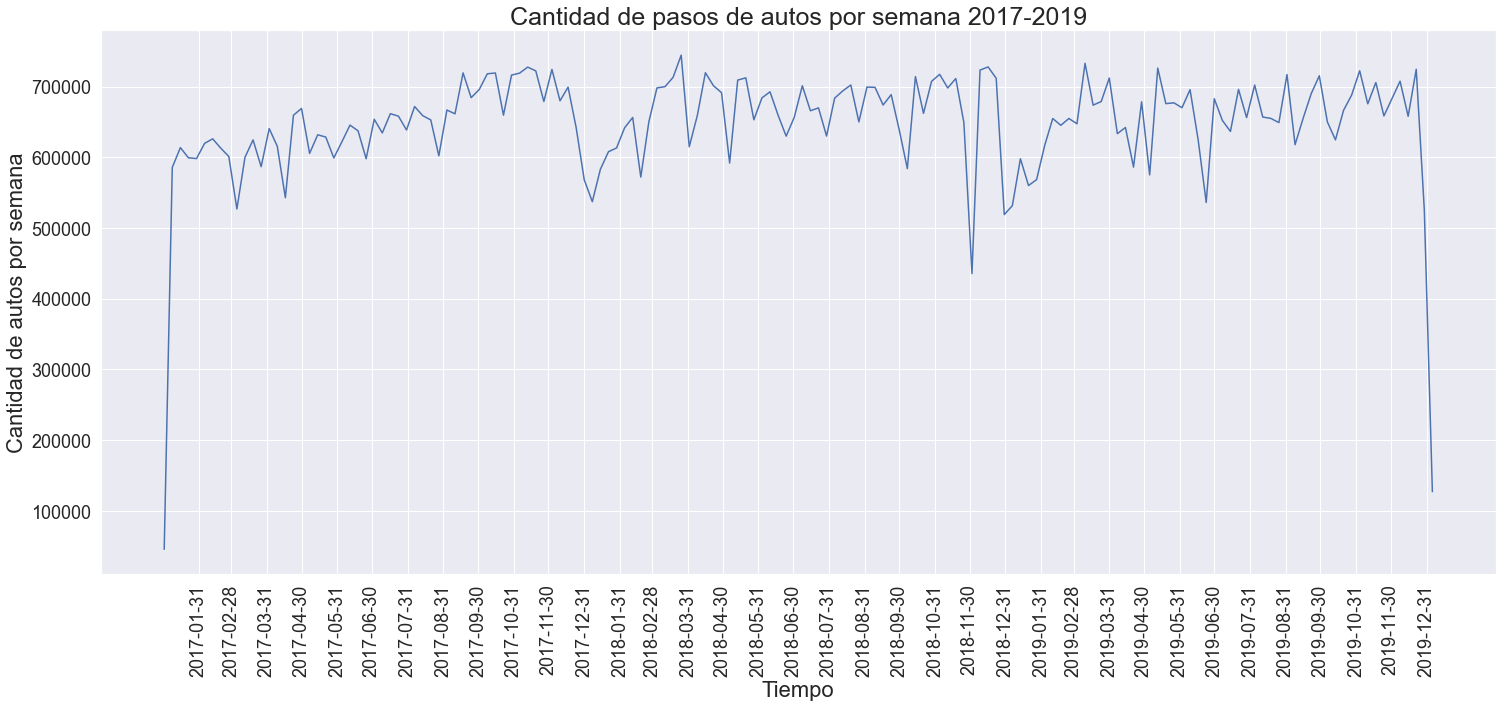

In [375]:
sns.set(rc = {'figure.figsize':(25,10)})
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xticks(mensual.index, rotation = 90)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Tiempo', fontsize = 22)
plt.ylabel('Cantidad de autos por semana', fontsize = 22)
plt.title("Cantidad de pasos de autos por semana 2017-2019", fontsize = 25)
plt.show()

Como puede apreciarse en el gráfico anterior, al resamplear por semana el tráfico parece ser constante, y pueden observarse caídas más marcadas en las semanas correspondientes a los meses de verano (enero y febrero), en comparación a los registros obtenidos en las visualizaciones diarias.

**Detección de valores atípicos**:

Al observar el gráfico con la distribución de la cantidad de autos por semana, se observan algunos valores atípicos, especialmente, en aquellos registros inferiores a los 500.000 pasos semanales. Para no alterar el índice eliminando dichos registros, se procede a asignarlos como NaN, para luego reemplazar estos últimos por el valor medio de la serie.


In [376]:
semanal.cantidad_pasos[semanal.cantidad_pasos < 500000] = np.nan

semanal['cantidad_pasos']=semanal.cantidad_pasos.fillna(semanal.cantidad_pasos.rolling(4, min_periods=1).mean())

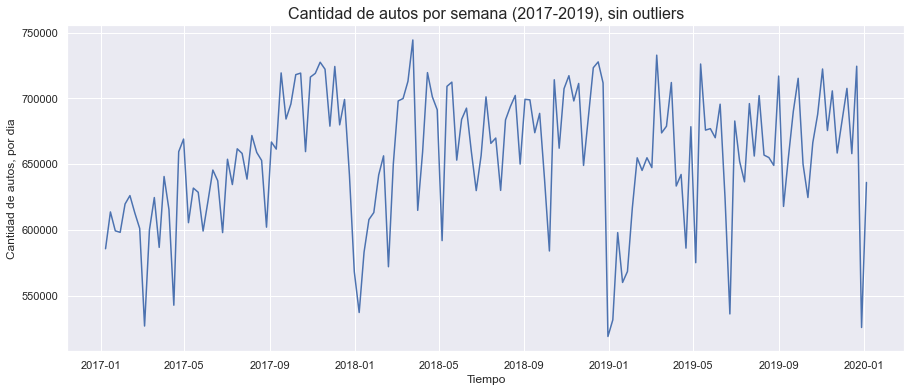

In [377]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de autos por semana (2017-2019), sin outliers", fontsize = 16)
plt.show()

En este gráfico, se puede probar con mayor exactitud lo que antes comenzaba a vislumbrarse y es que en los meses de vacaciones hay menos tráfico.

**Distribución de pasos por semana:** A continuación, se realiza un histograma sobre la distribución de la cantidad de pasos semanales, y puede apreciarse que la misma es casi asimétrica negativa.

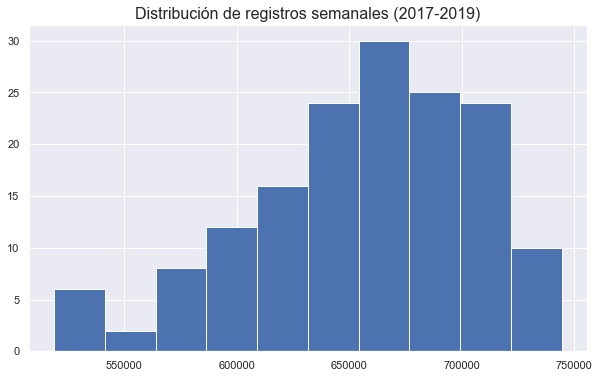

In [378]:
plt.figure(figsize = (10,6))
plt.hist(semanal.cantidad_pasos)
plt.title("Distribución de registros semanales (2017-2019)", fontsize = 16)
plt.show()

**Valores faltantes:** Para verificar la composición de la serie con la que se está trabajando, se imprimen la cantidad de valores faltantes por columnas que, al ser 0 (cero), permite continuar con el flujo de trabajo.

In [379]:
print('Cantidad de valores faltantes por columnas')
semanal.isnull().sum()

Cantidad de valores faltantes por columnas


cantidad_pasos    1
dtype: int64

En una primera instacia, se encuentra un valor nulo, por lo cual se utiliza la media para llenarlo y poder continuar trabajando con el objetivo propuesto previamente.


In [380]:
semanal['cantidad_pasos'] = semanal.cantidad_pasos.fillna(semanal.cantidad_pasos.rolling(7, min_periods = 1).mean().shift(-7))

In [381]:
semanal.isna().sum()

cantidad_pasos    0
dtype: int64

**Autocorrelación**

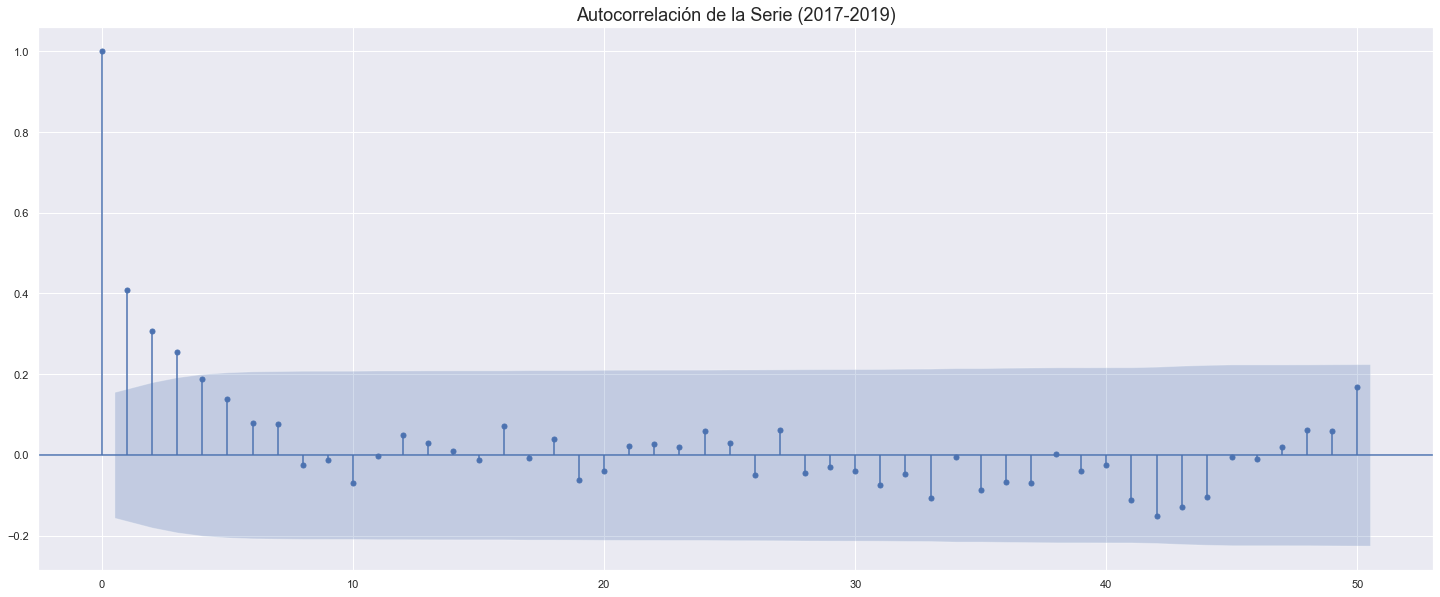

In [382]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(semanal.cantidad_pasos, lags = 50)
plt.title('Autocorrelación de la Serie (2017-2019)', fontsize = 18);
plt.show() 

Al realizar un gráfico de autocorrelación, nuevamente puede apreciarse la existencia de ciclos semanales. Sin embargo, en esta ocasión parecería que hay escasos valores de autocorrelación significativos, y que la serie es estacionaria. Esto último es lo que va a intentar probarse a continuación.

**Descomposición de la serie**


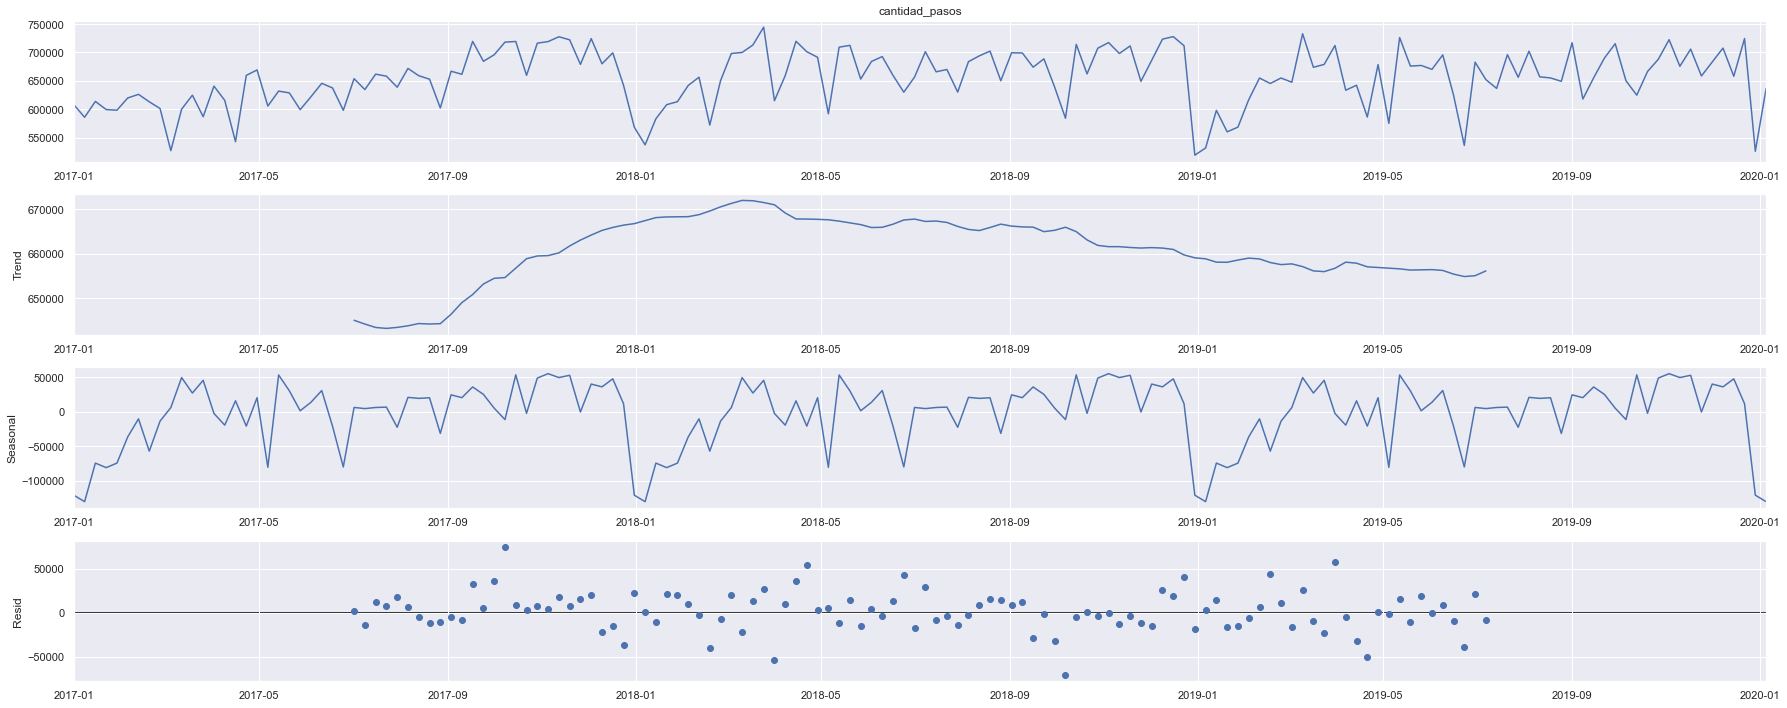

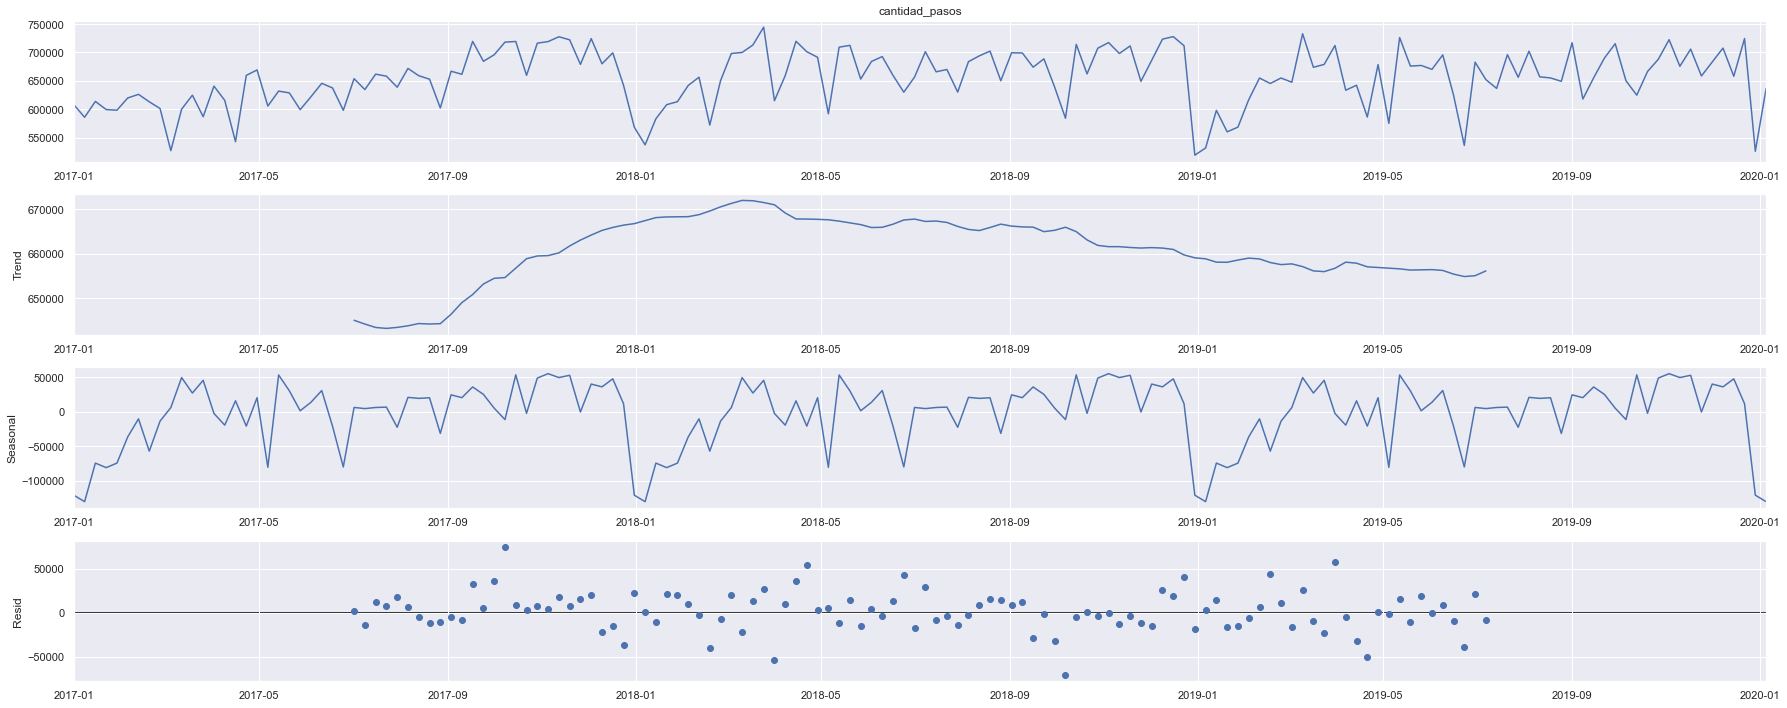

In [383]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(semanal.cantidad_pasos, model='aditive')
result.plot()

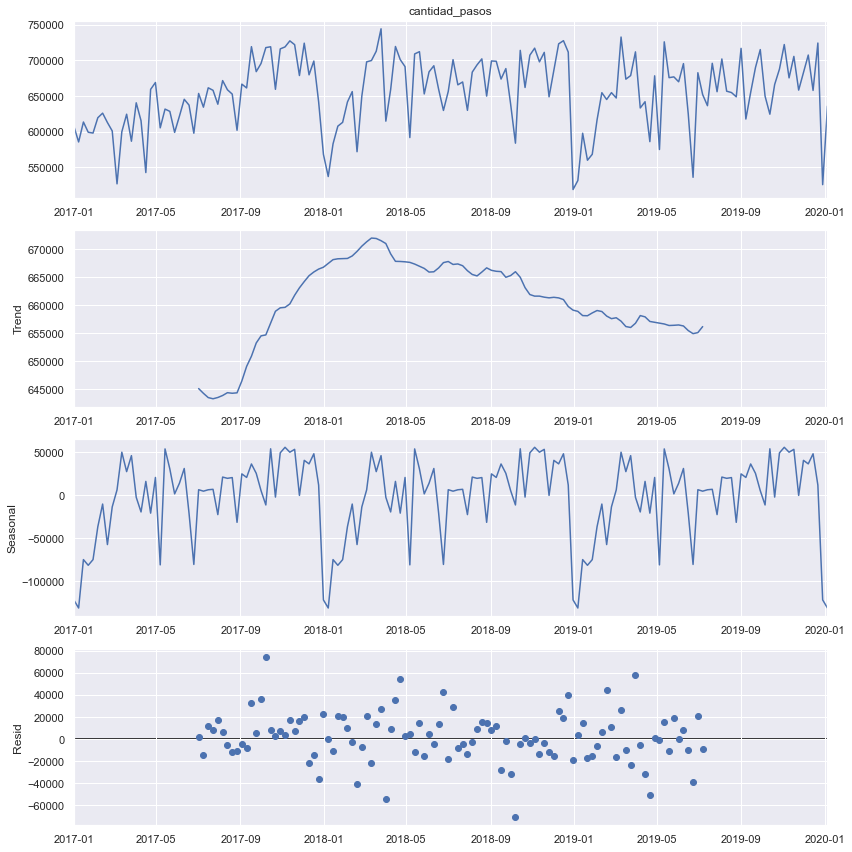

In [384]:
import matplotlib 
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

Al realizar los gráficos de descomposición de la serie, en la tendencia puede apreciarse como la misma crece hasta el 2018, para luega decaer y estabilizarse alrededor del año 2019. Así también, se observan ciclos mensuales bastante marcados, y una caída del tráfico en los meses de vacaciones, tal como se había mencionado con anterioridad. Al analizar los residuos, se advierte que los mismos se distriubuyen de manera uniforme, siendo problemente causados por ruido blanco.

**Histograma de los residuos**

Por útltimo, se realiza un histograma para obervar los residuos y, al graficarlo, puede observarse que los mismos adoptan una distribución bastante simétrica.

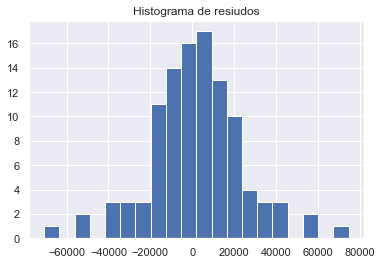

In [385]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.title("Histograma de resiudos", fontsize = 12)
plt.show()

**Dickey-Fuller test**

Con el fin de determinar las propiedades de estacionariedad de la serie se aplica el Test de Dickey Fuller, y se puede afirmar que la misma se trata de una serie estacionaria, es decir, que la media y la varianza son constantes en el tiempo. 

In [386]:
#Augmented Dickey-Fuller test 
from statsmodels.tsa.stattools import adfuller
X = semanal.cantidad_pasos
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.634286
p-value: 0.000001
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577


Valor p> 0.05: No se rechaza la hipótesis nula (H0), los datos tienen una raíz unitaria y no son estacionarios.

valor p <= 0.05: Rechaza la hipótesis nula (H0), los datos no tienen raíz unitaria y son estacionarios.

In [387]:
X = semanal.cantidad_pasos
result = adfuller(np.log(X)) #hacemos un logaritmo del valor y nos vuelve a dar que es estacionaria. 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.690260
p-value: 0.000001
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577


**One-Step Prediction**


In [388]:
senial = semanal.cantidad_pasos
senial.head()

fecha
2017-01-01    607944.142857
2017-01-08    585700.000000
2017-01-15    613675.000000
2017-01-22    599307.000000
2017-01-29    598163.000000
Freq: W-SUN, Name: cantidad_pasos, dtype: float64

In [389]:
# Se define la cantidad de datos (semanas) con los que se predecirá:

look_back = 8

In [390]:
# Se genera la tabla VACÍA con la que se entrenará el modelo:

N = senial.shape[0]
X = np.zeros((N - look_back - 1, look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(149, 8) (149,)


In [391]:
# Se completa la tabla con los datos de las observaciones:

for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [392]:
# Se entrenará al modelo con observaciones de los dos primeros años, para luego evaluarlo con los datos del último año (52 semanas).

N_train = 2 * 53 - look_back
N_test = 1 * 52
N_total = N_train + N_test

length_total = N_train + N_test + look_back
                                            
X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train : N_train + N_test,:]
y_test = y[N_train : N_train + N_test]
print(X_test.shape, y_test.shape)

(98, 8) (98,)
(51, 8) (51,)


#### Nuevo modelo de Machine Learning: Gradient Boosting Regressor

A continuación, se entrenará un modelo diferente a los utilizados en los proyectos anteriores. En regresores como GradientBoostingRegressor o RandomForestRegressor, la importancia de los predictores está basada en la reducción de impureza, y por eso se ha optado por probar el entrenamiento y evaluación con este modelo, dado que en ocasiones previas sólo se ha utilizado el RandomForestRegressor.

Así, el GradientBoostingRegressor construye un modelo aditivo de manera progresiva por etapas y, en cada etapa, se ajusta un árbol de regresión al gradiente negativo de la función de pérdida dada.

In [393]:
from sklearn.ensemble import GradientBoostingRegressor

In [394]:
est = GradientBoostingRegressor(random_state=1).fit(X_train, y_train)

In [395]:
y_pred = est.predict(X)
y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

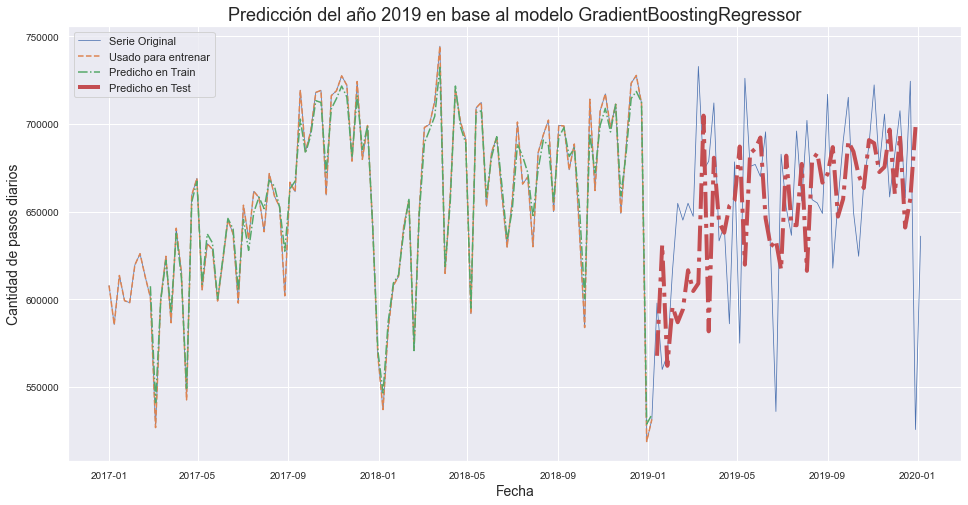

In [396]:
plt.figure(figsize = (16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back : look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train + look_back : length_total - 1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Predicción del año 2019 en base al modelo GradientBoostingRegressor', fontsize = 18);
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos diarios', fontsize = 14);
plt.show()

In [397]:
#Función para evaluar regresiones:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluar_regresion(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f'R2 en Train: {r2_train}')
    print(f'R2 en Test: {r2_test}')
    
    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'Train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'Test')
    plt.title('Gráfico: Densidad de Errores', fontsize = 11, loc = 'center', wrap = True);
    plt.xlabel('Errores', fontsize = 9)
    plt.ylabel('Densidad', fontsize = 9)
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s = 2)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
   
    ax.plot(lims, lims, 'k-', alpha = 0.75, zorder = 0)
    plt.title('Gráfico: Val. Reales vs Val. Predichos (Test)', fontsize = 11, loc = 'center', wrap = True)
    plt.xlabel('y (Test)', fontsize = 9)
    plt.ylabel('y_pred (Test)', fontsize = 9)

    plt.tight_layout()
    plt.show()

Raíz del error cuadrático medio en Train: 7630.696688516581
Raíz del error cuadrático medio en Test: 54851.73672936235
R2 en Train: 0.9775746212366527
R2 en Test: -0.3173817863951838


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


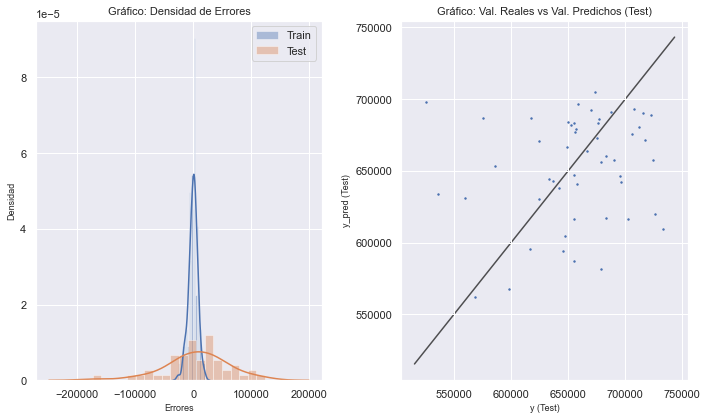

In [398]:
evaluar_regresion(est, X_train, X_test, y_train, y_test)

**Conclusiones e interpretación de modelos:**

Al analizar este nuevo modelo entrenado y evaluado, pueden apreciarse renidmientos similares al Random Forest del One-Step Prediction del Proyecto 03. Así, al analizar la  distribución de errores, se puede observar una nube de puntos acotada, pero un poco más dispersa que en el Random Forest, motivo por el cual, en este caso, también pareciera haber problemas para estimar valores bajos y valores altos. Si bien al comparar las métricas, el GradientBoostingRegressor mejora su performance en el conjunto de train (r2=0.97), en comparación al RandomForestRegressor (r2=0.95); ambos mantienen una brecha demasiado amplia con el conjunto de test, con un r2 cercano a cero en los dos modelos.

Al comparar los valores de y vs. y_pred para el conjunto de Test, esa dispersión de puntos observada -si bien se ubica cerca de la diagonal-, dista de ser adecuada para lo que se espera de un regresor con buen rendimiento.

Como se ha mencionado con anterioridad, ninguno de los modelos es bueno para estimar el flujo diario. Y, si bien estiman bien los ciclos, no son buenos a la hora de estimar magnitudes, y trabajan con datos que tienen demasiada dispersión incluso en una semana.

El histograma de los errores tiene una distribución que se aproxima a una gaussiana, bastante simétrica para ambos conjuntos. Aún así, el modelo parece ser demasiado impreciso, tanto para los conjuntos de Train, como para los de Test.

Por último, si bien en este Proyecto se ha reducido notablemente la cantidad de datos con los que se trabajó, en esta ocasión se pudo trabajar con una serie estacionaria, con una visualización más amigable y suavizada que, incluso, permitió observar los ciclos y la disminución esperada en los meses de verano para el tráfico de la Ciudad. El poder trabajar con todos los medios de pago, también permitió derribar teorías que podrían haber indicado que se la tendencia de la serie y de la circulación era decreciente.

